## **Doctoral Seminar For Data Science**
# Title: **The Potential of the Application of Deep Learning for Landslide Detection**
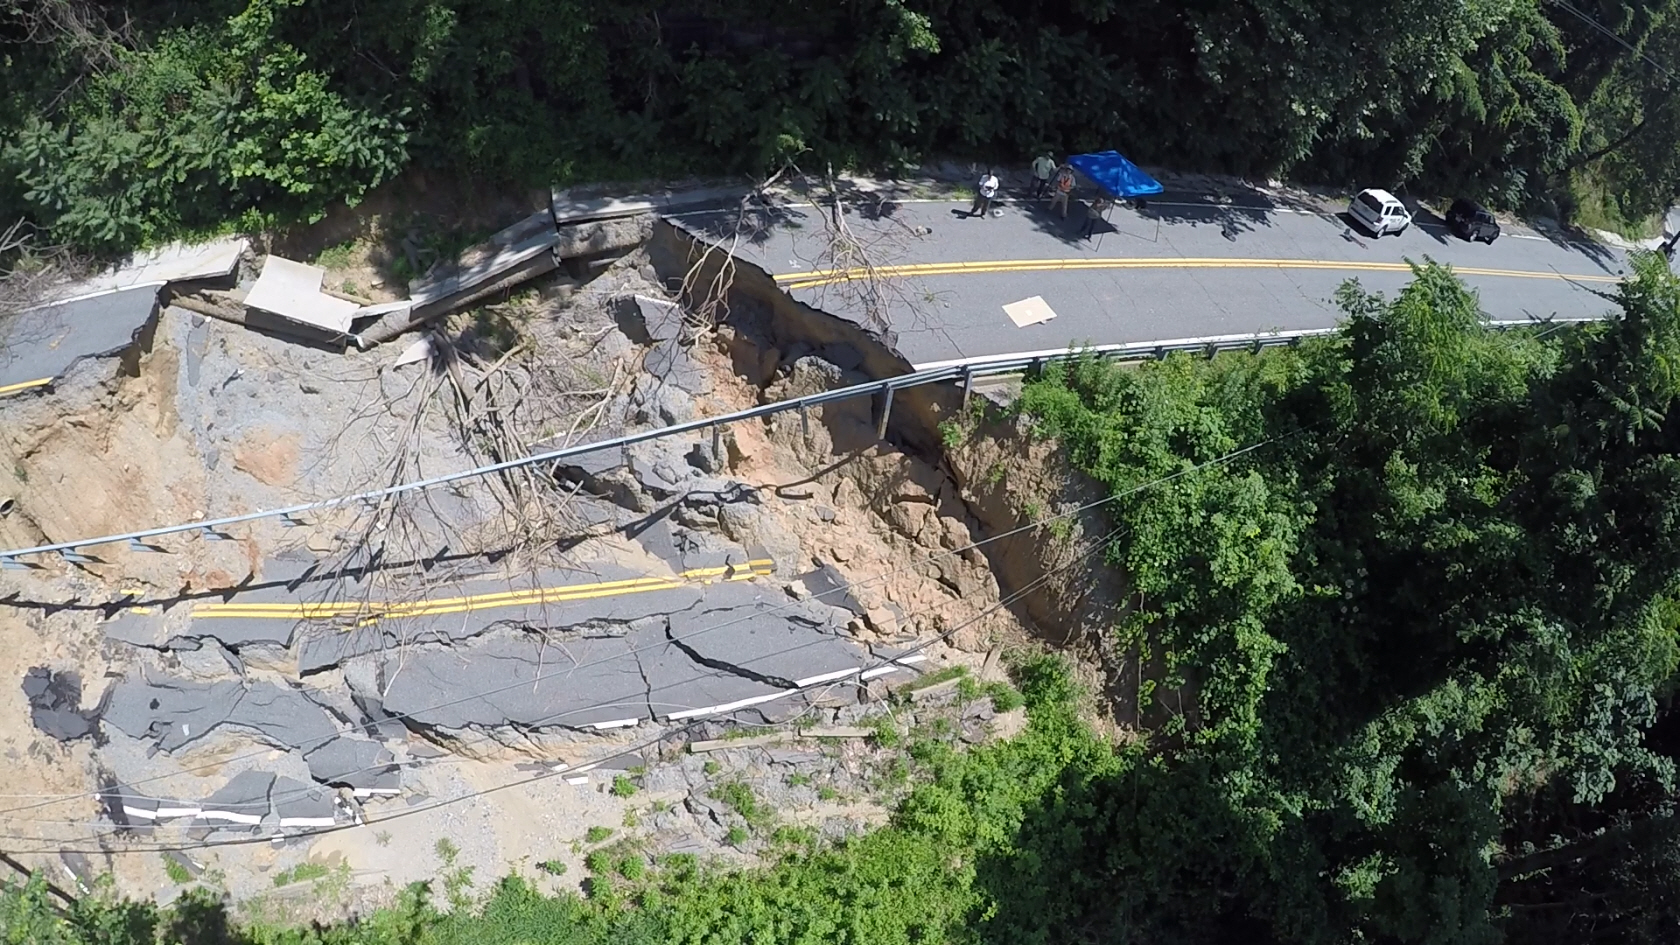


## **Code author: Gazali Agboola**

## **Professor: Dr. Zayed Mostafa**

## **Date: 03/19/2024**



# 1. **INTRODUCTION**
### Landslides represent a significant natural hazard, causing immense damage to lives, infrastructure, and the environment. Traditional methods of landslide detection often lack efficiency and scalability, prompting the exploration of innovative approaches leveraging modern technologies. In recent years, the integration of deep learning techniques with remote sensing imagery has emerged as a promising solution for accurate and timely landslide detection. This objective of this presentaion is to  provide the potential of the application of deep learning algorithms to analyze remote sensing data for landslide detection,utilizing an open source dataset obtained from Meena et al. 2023. To read about the data [Click here](https://essd.copernicus.org/articles/15/3283/2023/essd-15-3283-2023.pdf) 
# SEMANTIC SEGMENTATION
### **Semantic segmentation** is a vital aspect of computer vision, assigning semantic labels to individual pixels in an image for tasks like medical imaging and satellite imaging applications etc.  
### It involves pixel-level labeling using an **encoder-decoder** architecture, where the encoder extracts features and the decoder reconstructs spatial information. 
### This collaboration between discriminative and generative networks facilitates accurate semantic labeling of images.








# 2. **Data Annotation**
### Data annotation involves labeling or annotating data to create ground-truth labels for machine learning models.
### In semantic segmentation, assigning a label to each pixel in an image, indicating the object or class it belongs to is very important. Annotated data serves as the training set for supervised learning models. It provides the necessary information for the model to learn patterns and make predictions.
### Data annotation, masking, and tiling can be done using the deep learning training data generation tools on GIS. Python libraries like Rasterio, OpenCV can also be used for tiling. 
### Geotile package [here](https://github.com/osgeonepal/geotile) can also be used for masking, tiles generation, and conversiong to numpy array but it requires GDAL software installation.

### There are many annotation software available. Some of them are:
1. QuPath
2. Label Studio
3. makesense.ai
4. Labkit

### The details of the training and testind datasets used in this project can be obtained [here](https://essd.copernicus.org/preprints/essd-2022-350/) 

In [3]:
#Changing work directory
import os
os.chdir(r'C:\Users\goagboola\Desktop\7189381')

In [4]:
import numpy as np

# Load the training data
file_path = r"trainX.npy"
trainX = np.load(file_path)
print(f"The shape of the X training dataset is : {trainX.shape}")

# Load the training data
file_path = r"trainY.npy"
trainY = np.load(file_path)
print(f"The shape of the Y training dataset is : {trainY.shape}")

# Load the test data
file_path = r"testX.npy"
testX = np.load(file_path)
print(f"The shape of the X training dataset is : {testX.shape}")

file_path = r"testY.npy"
testY = np.load(file_path)
print(f"The shape of the Y test dataset is : {testY.shape}")


The shape of the X training dataset is : (1119, 128, 128, 4)
The shape of the Y training dataset is : (1119, 128, 128, 1)
The shape of the X training dataset is : (355, 128, 128, 4)
The shape of the Y test dataset is : (355, 128, 128, 1)


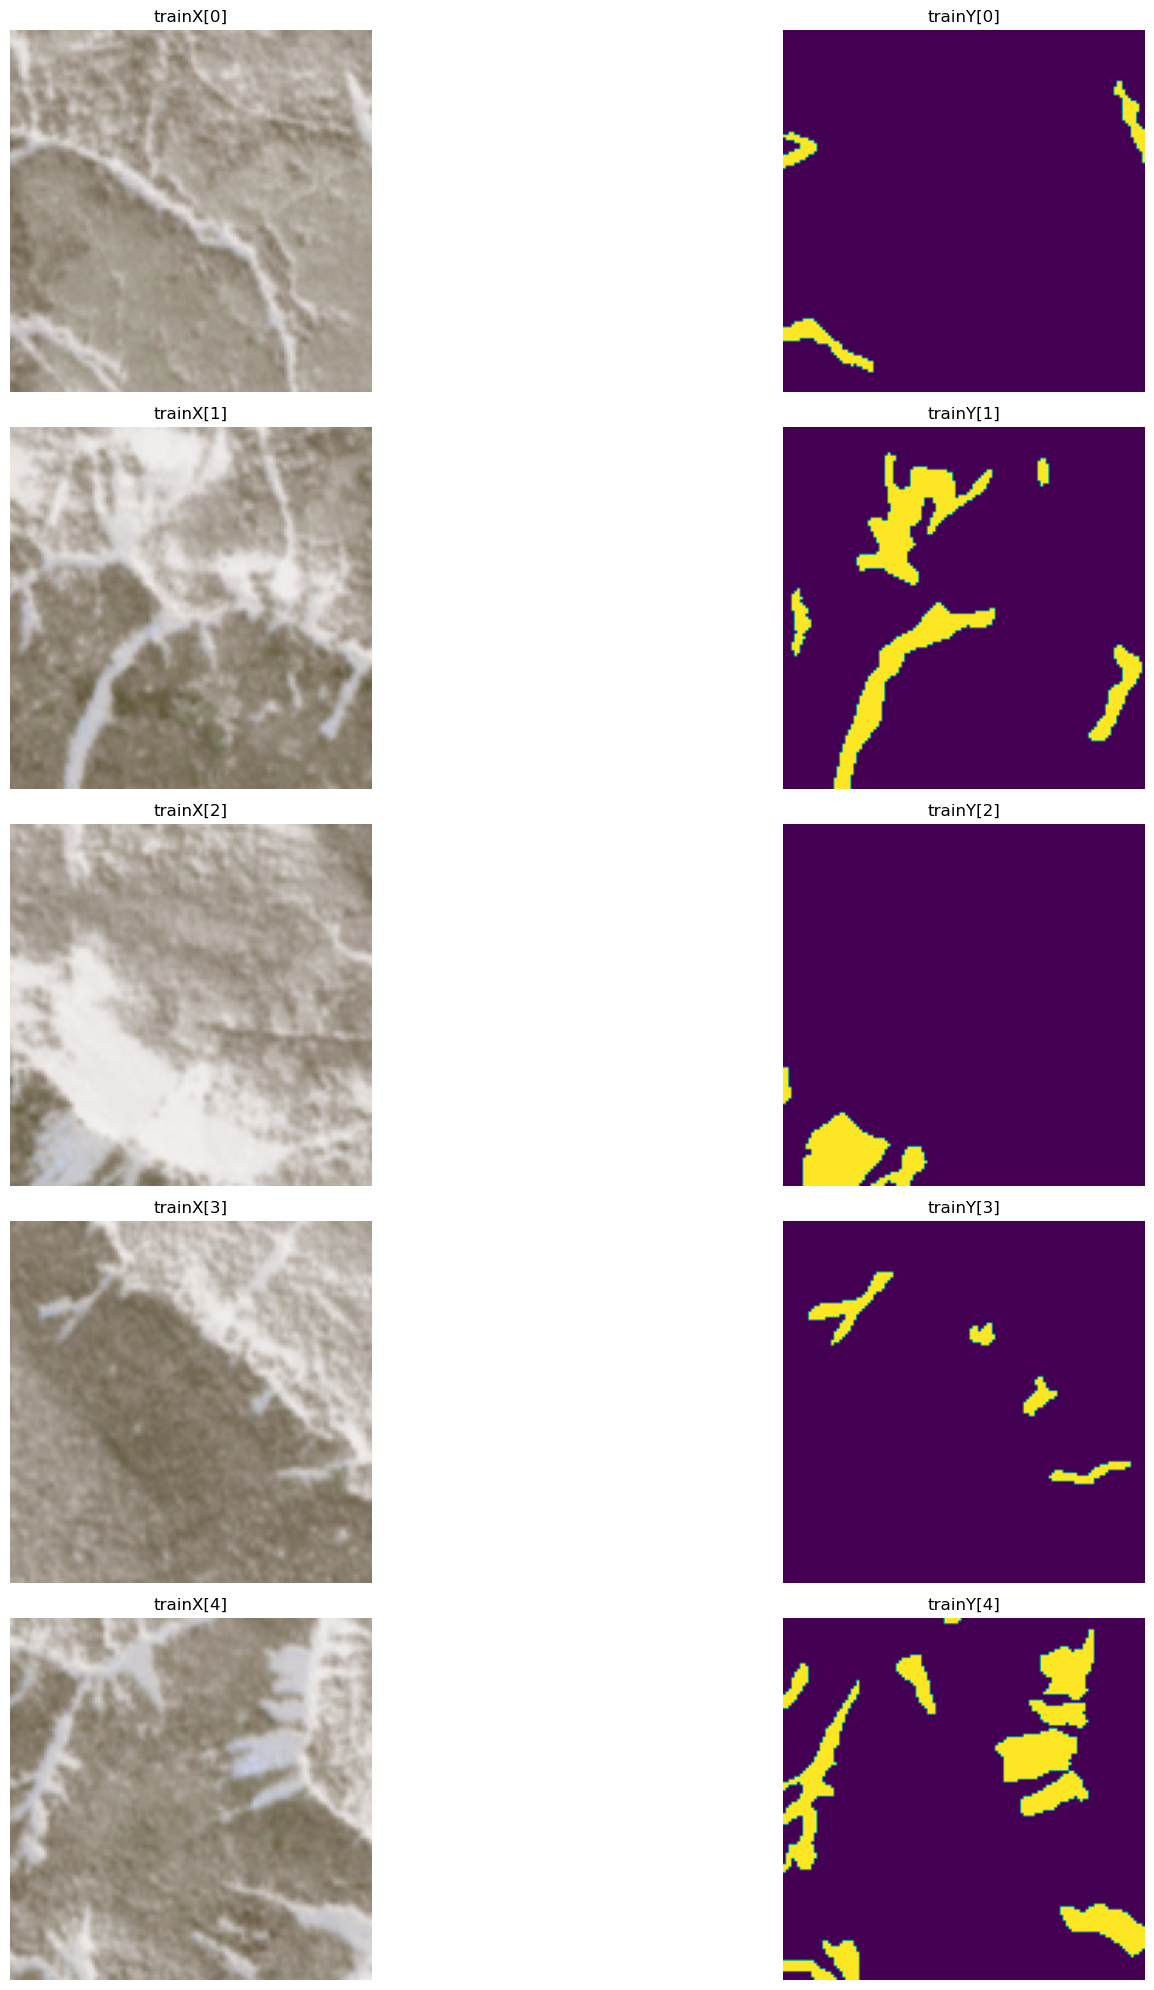

In [8]:
import matplotlib.pyplot as plt

# Plot the first 10 images of trainX and trainY side by side
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))

for i in range(5):
    axes[i, 0].imshow(trainX[i])
    axes[i, 0].set_title(f"trainX[{i}]")
    axes[i, 0].axis('off')
    
    axes[i, 1].imshow(trainY[i])
    axes[i, 1].set_title(f"trainY[{i}]")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()


# 3. MODEL BUILDING
## LinkNet
### LinkNe has been tilized in landslide detection by training on labeled satellite or aerial images of landslide-prone areas. Once trained, the model can segment new images to identify regions at risk of landslides. 
### Post-processing techniques can refine the results, and the segmented regions can be used for prediction and monitoring, aiding in disaster management efforts.
### LinkNet architecture consists of an encoder-decoder structure with skip connections. The encoder extracts features from the input image at different scales through convolutional layers. Skip connections transmit information from the encoder to corresponding decoder layers, preserving spatial information. The decoder gradually upsamples the features to generate a segmentation mask. Link modules connect encoder and decoder stages, facilitating hierarchical feature learning. 
### Overall, LinkNet is designed to efficiently perform semantic segmentation tasks while maintaining spatial details through skip connections and link modules. To read more about LinkNet, check the original paper [here](https://arxiv.org/abs/1707.03718)

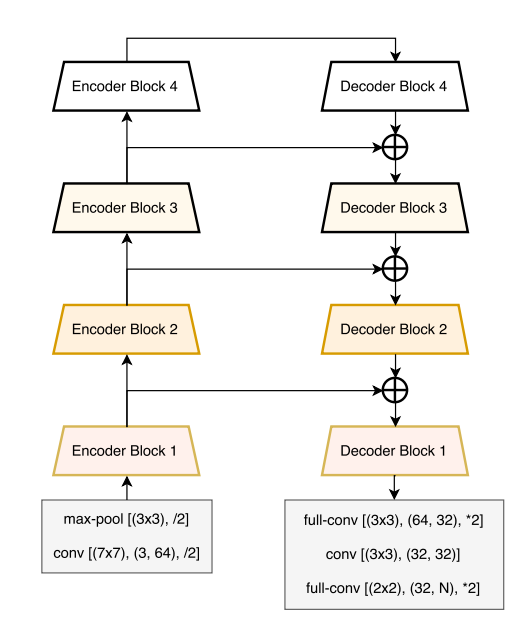

## UNet



UNet
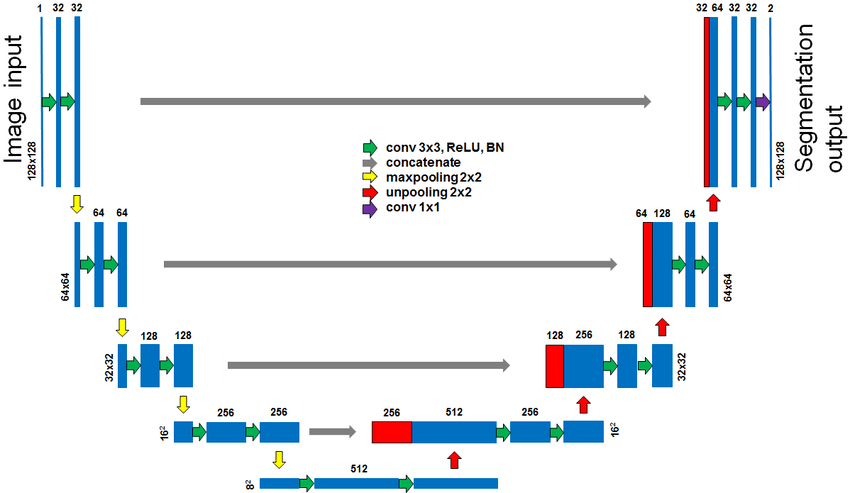



The first model that always come to mind during segmentation task is the Unet model. Unet was developed by Ronneberger et. al. in 2015 for image segentation for biomedical purposes. However, Unet has been widely applied for satellite images processing especially for landslide detection.  [here](https://arxiv.org/abs/1707.03718).


## Here are the reasons while UNet is mostly used in semantic segmentations tasks:
### U-Net outperformed sliding window technique in ISBI challenge
### Sliding window technique suited for localization tasks by solving the drawbacks of redundancy, slow training
### U-Net architecture consists of encoder and decoder networks
### Encoder learns "what" is in the image
### Decoder upsamples feature maps to match input size and show where the image is localized
### Bottleneck layer produces final feature map
### Skip connections facilitate information flow
### Decoder generates segmentation masks
### Skip connections enhance segmentation accuracy

### if you want to read more about UNet [click here](https://arxiv.org/abs/1707.03718).

In [10]:
"""Defining the precision and recall. F1 score is used as the benchmark to measure the model performance
The test dataset is used as validation dataset"""

import tensorflow as tf
from tensorflow.keras import backend as K

# recall 
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

# precision
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

#f1 score
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, Conv2DTranspose, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
import numpy as np

def conv_block(inputs, num_filters, kernel_size=(3, 3), padding='same', strides=1):
    x = Conv2D(num_filters, kernel_size, padding=padding, strides=strides)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def encoder_block(inputs, num_filters, pool_size=(2, 2), dropout=0.1):
    x = conv_block(inputs, num_filters)
    x = conv_block(x, num_filters)
    pool = MaxPooling2D(pool_size)(x)
    if dropout:
        pool = tf.keras.layers.Dropout(dropout)(pool)
    return x, pool

def decoder_block(inputs, skip_features, num_filters, dropout=0.1):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding='same')(inputs)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    x = conv_block(x, num_filters)
    if dropout:
        x = tf.keras.layers.Dropout(dropout)(x)
    return x

def build_linknet(input_shape):
    inputs = Input(input_shape)
    
    # Encoder
    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)
    
    # Bridge
    b1 = conv_block(p4, 1024)
    
    # Decoder
    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)
    
    # Output layer
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(d4)
    
    model2 = Model(inputs=[inputs], outputs=[outputs])
    return model2

# Instantiate the model
input_shape = (128, 128, 4)
model2 = build_linknet(input_shape)

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])

# Display model summary
model2.summary()

# Set up callbacks
checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model_test_{val_f1_m:.2f}.h5", monitor="val_f1_m", verbose=1, save_best_only=True, mode="max")
callbacks = [checkpointer]

# Training
history = model2.fit(trainX, trainY, batch_size=16,  
                    epochs=100, 
                    verbose=2,
                    validation_data=(testX, testY),
                    callbacks=callbacks)

# Save the model
model2.save("linknet_model2.h5")

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 4)]        0         []                            
                                                                                                  
 conv2d_18 (Conv2D)          (None, 128, 128, 64)         2368      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_17 (Ba  (None, 128, 128, 64)         256       ['conv2d_18[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_17 (Activation)  (None, 128, 128, 64)         0         ['batch_normalization_17

C:\Users\goagboola\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


70/70 - 717s - loss: 0.2678 - accuracy: 0.9112 - f1_m: 0.5561 - precision_m: 0.6058 - recall_m: 0.5460 - val_loss: 0.3358 - val_accuracy: 0.8908 - val_f1_m: 1.0622e-04 - val_precision_m: 0.0870 - val_recall_m: 5.3160e-05 - 717s/epoch - 10s/step
Epoch 2/100

Epoch 2: val_f1_m did not improve from 0.00011
70/70 - 659s - loss: 0.1849 - accuracy: 0.9258 - f1_m: 0.5975 - precision_m: 0.6551 - recall_m: 0.5680 - val_loss: 0.3925 - val_accuracy: 0.8908 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - 659s/epoch - 9s/step
Epoch 3/100

Epoch 3: val_f1_m improved from 0.00011 to 0.00588, saving model to best_model_test_0.01.h5
70/70 - 662s - loss: 0.1745 - accuracy: 0.9278 - f1_m: 0.6033 - precision_m: 0.6739 - recall_m: 0.5675 - val_loss: 0.4323 - val_accuracy: 0.8913 - val_f1_m: 0.0059 - val_precision_m: 0.1734 - val_recall_m: 0.0030 - 662s/epoch - 9s/step
Epoch 4/100

Epoch 4: val_f1_m improved from 0.00588 to 0.03834, saving model to best_model_test_0.04.h5
7

In [15]:
loss, accuracy, f1_score, precision, recall = model2.evaluate(testX, testY, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.17775727808475494 0.9410694241523743 0.698401153087616 0.7917695045471191 0.6407405734062195


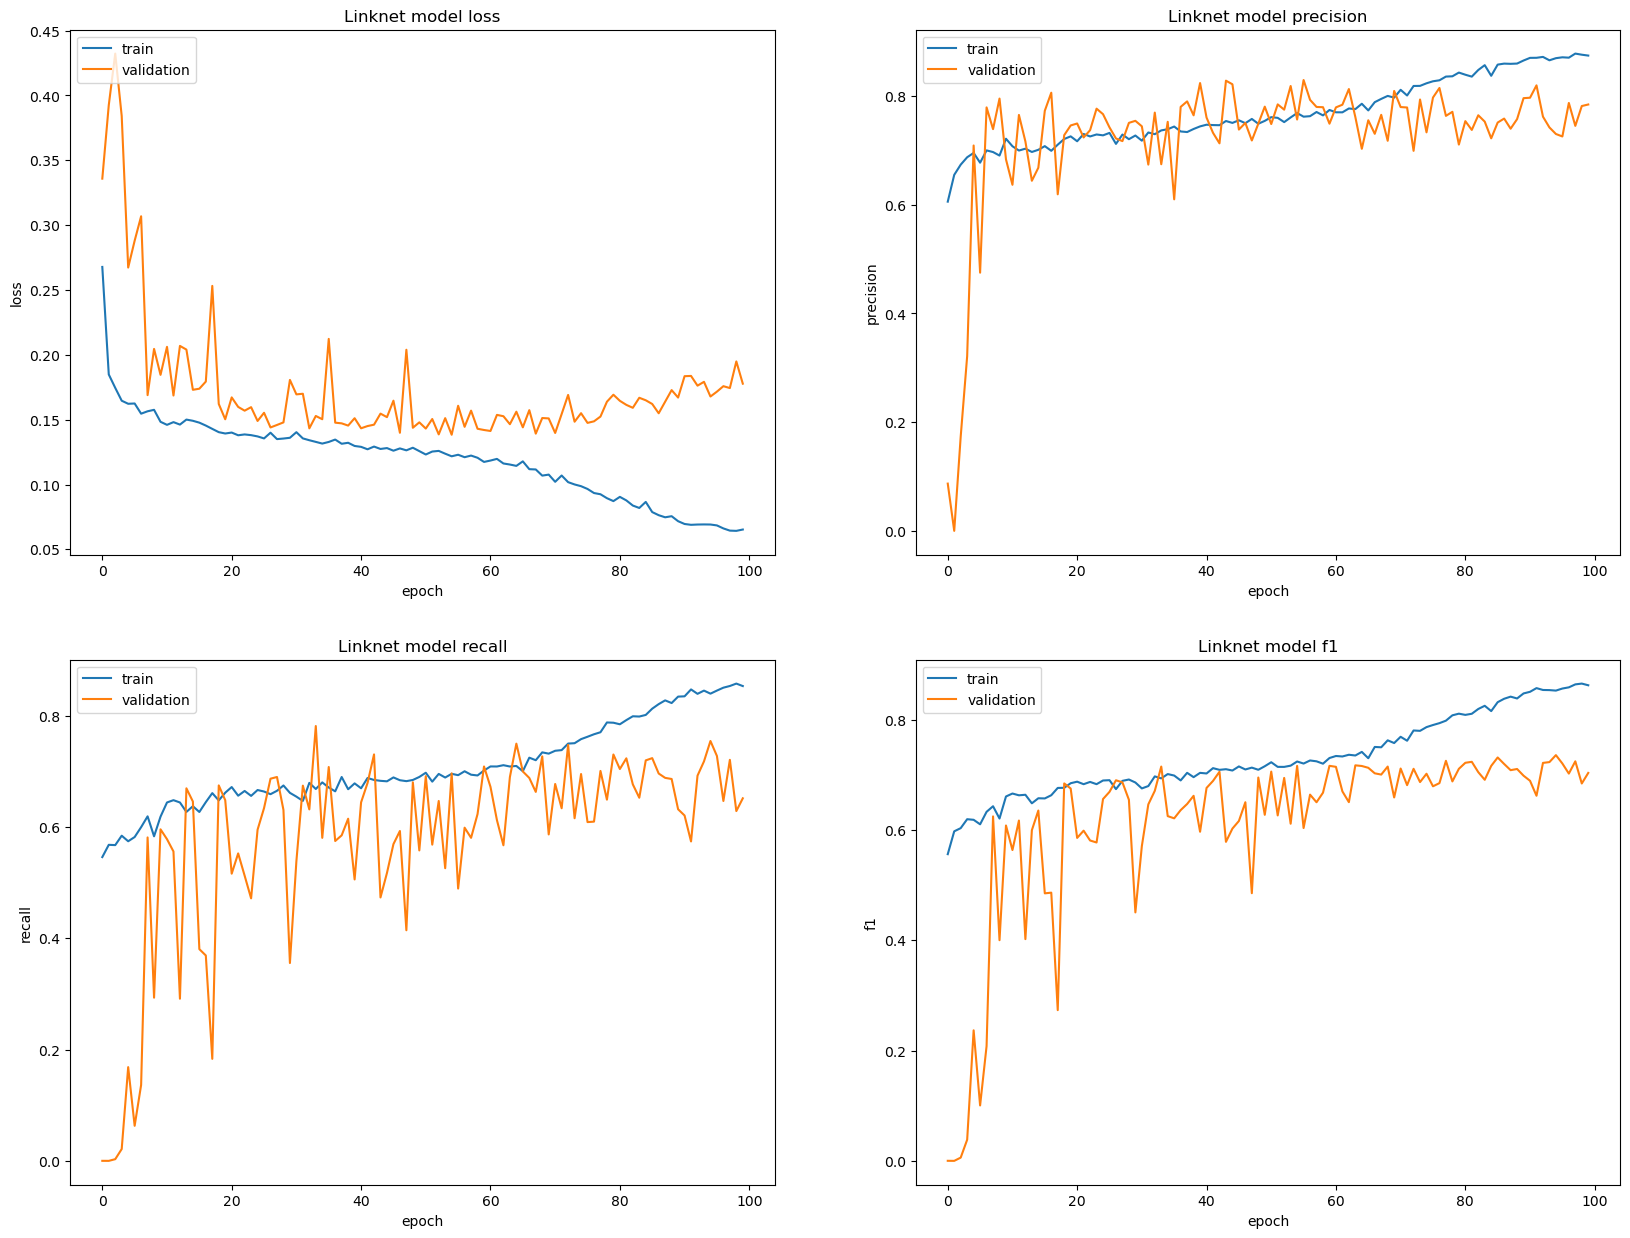

In [16]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline


ig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Linknet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('Linknet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('Linknet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('Linknet model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

In [17]:
def unet_model(IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS))

    # Converted inputs to floating
    #s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)


    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])
    
    return model
model = unet_model(128, 128, 4)
# model.summary()
checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model_unet.h5", monitor="val_f1_m", verbose=1, save_best_only=True, mode="max")
# earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10, verbose=1, mode='max')

callbacks = [
    # earlyStopping,
    checkpointer
    ]
history = model.fit(trainX, trainY, batch_size=16,  
          epochs=100, 
          verbose = 2,
          validation_data=(testX, testY),
          callbacks=callbacks)

model.save("unetmodel_save.h5")

Epoch 1/100

Epoch 1: val_f1_m improved from -inf to 0.33243, saving model to best_model_unet.h5


C:\Users\goagboola\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


70/70 - 121s - loss: 0.3052 - accuracy: 0.8852 - f1_m: 0.2370 - precision_m: 0.4805 - recall_m: 0.2270 - val_loss: 0.2173 - val_accuracy: 0.9088 - val_f1_m: 0.3324 - val_precision_m: 0.7353 - val_recall_m: 0.2387 - 121s/epoch - 2s/step
Epoch 2/100

Epoch 2: val_f1_m improved from 0.33243 to 0.48715, saving model to best_model_unet.h5
70/70 - 115s - loss: 0.1915 - accuracy: 0.9209 - f1_m: 0.5113 - precision_m: 0.6986 - recall_m: 0.4332 - val_loss: 0.2260 - val_accuracy: 0.9201 - val_f1_m: 0.4871 - val_precision_m: 0.7313 - val_recall_m: 0.4054 - 115s/epoch - 2s/step
Epoch 3/100

Epoch 3: val_f1_m improved from 0.48715 to 0.57444, saving model to best_model_unet.h5
70/70 - 116s - loss: 0.1834 - accuracy: 0.9234 - f1_m: 0.5470 - precision_m: 0.6942 - recall_m: 0.4795 - val_loss: 0.2063 - val_accuracy: 0.9252 - val_f1_m: 0.5744 - val_precision_m: 0.7297 - val_recall_m: 0.5255 - 116s/epoch - 2s/step
Epoch 4/100

Epoch 4: val_f1_m improved from 0.57444 to 0.62109, saving model to best_model_

In [18]:
loss, accuracy, f1_score, precision, recall = model.evaluate(testX, testY, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.21935047209262848 0.9383838772773743 0.6938158869743347 0.7531704902648926 0.6664090752601624


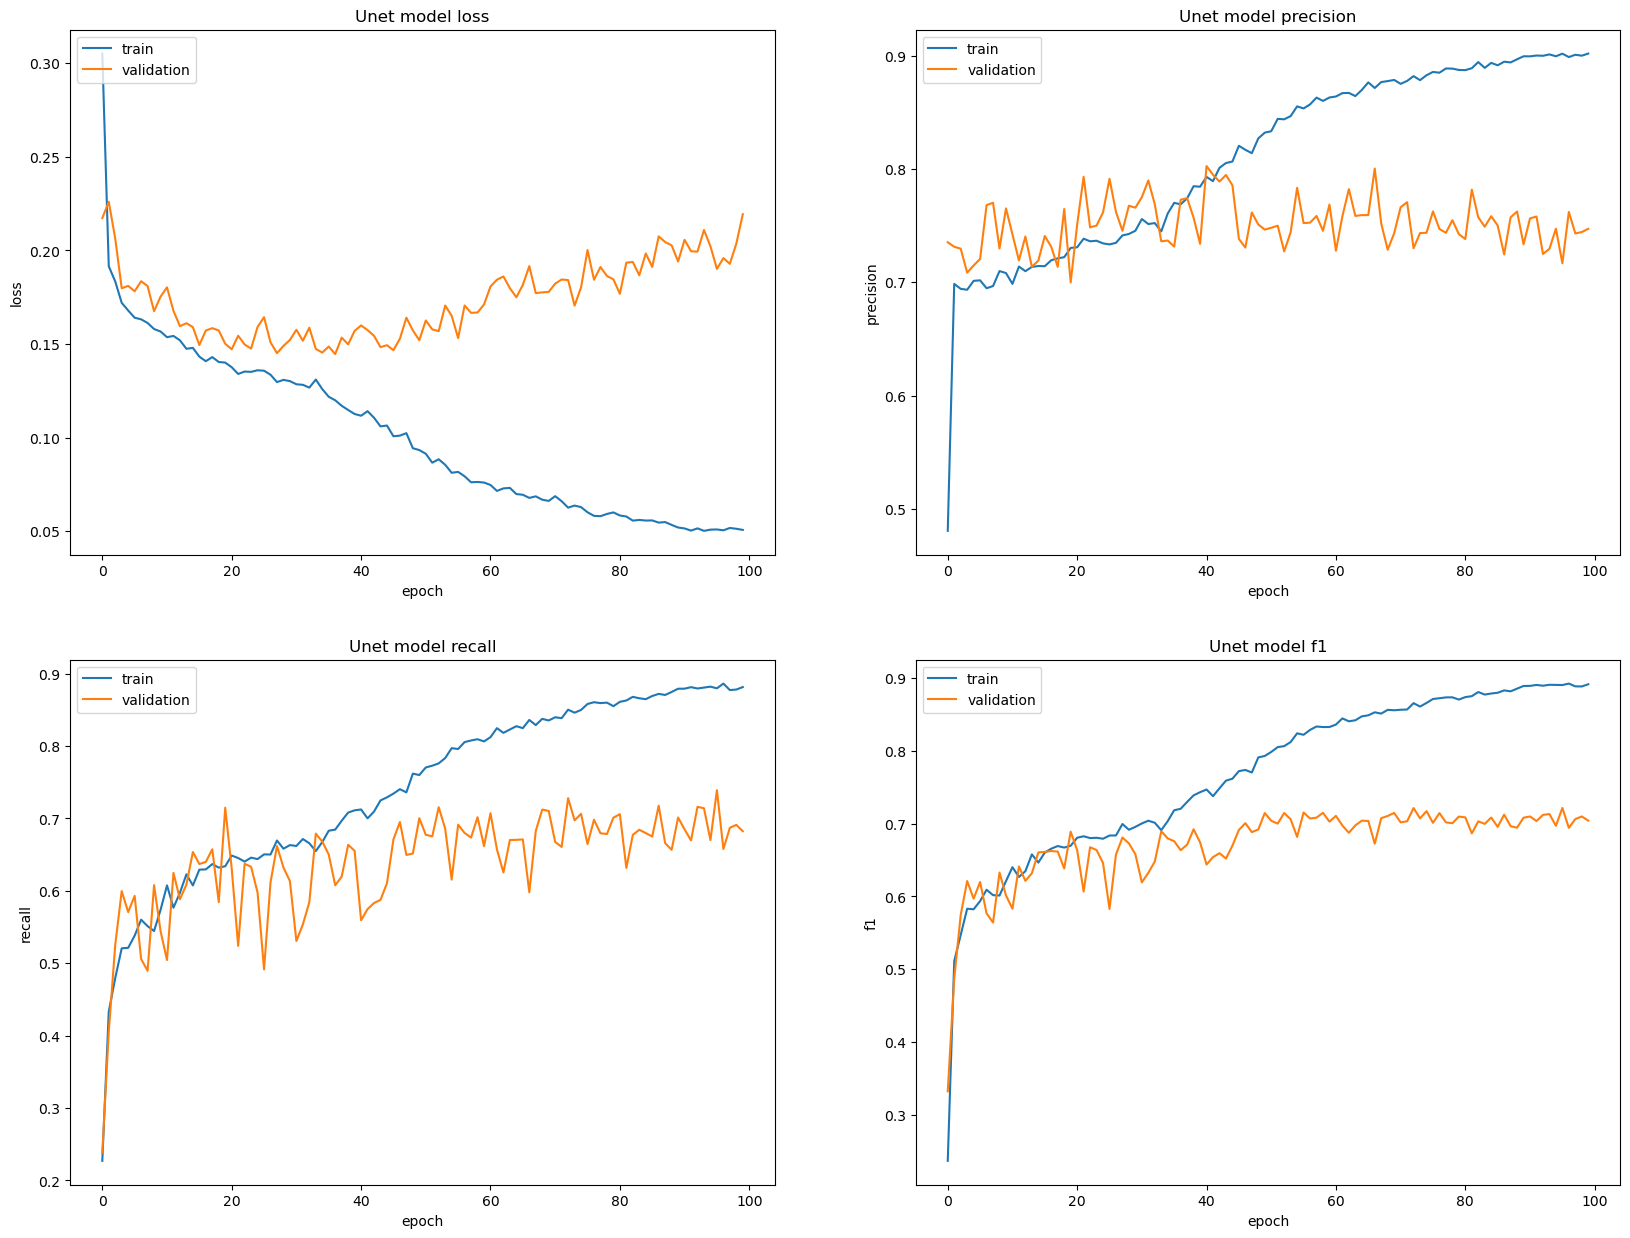

In [19]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline


ig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Unet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('Unet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('Unet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('Unet model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

# 4. **Result Comparison**

1/1 [==============================] - 0s 286ms/step


IndexError: index 10 is out of bounds for axis 0 with size 10

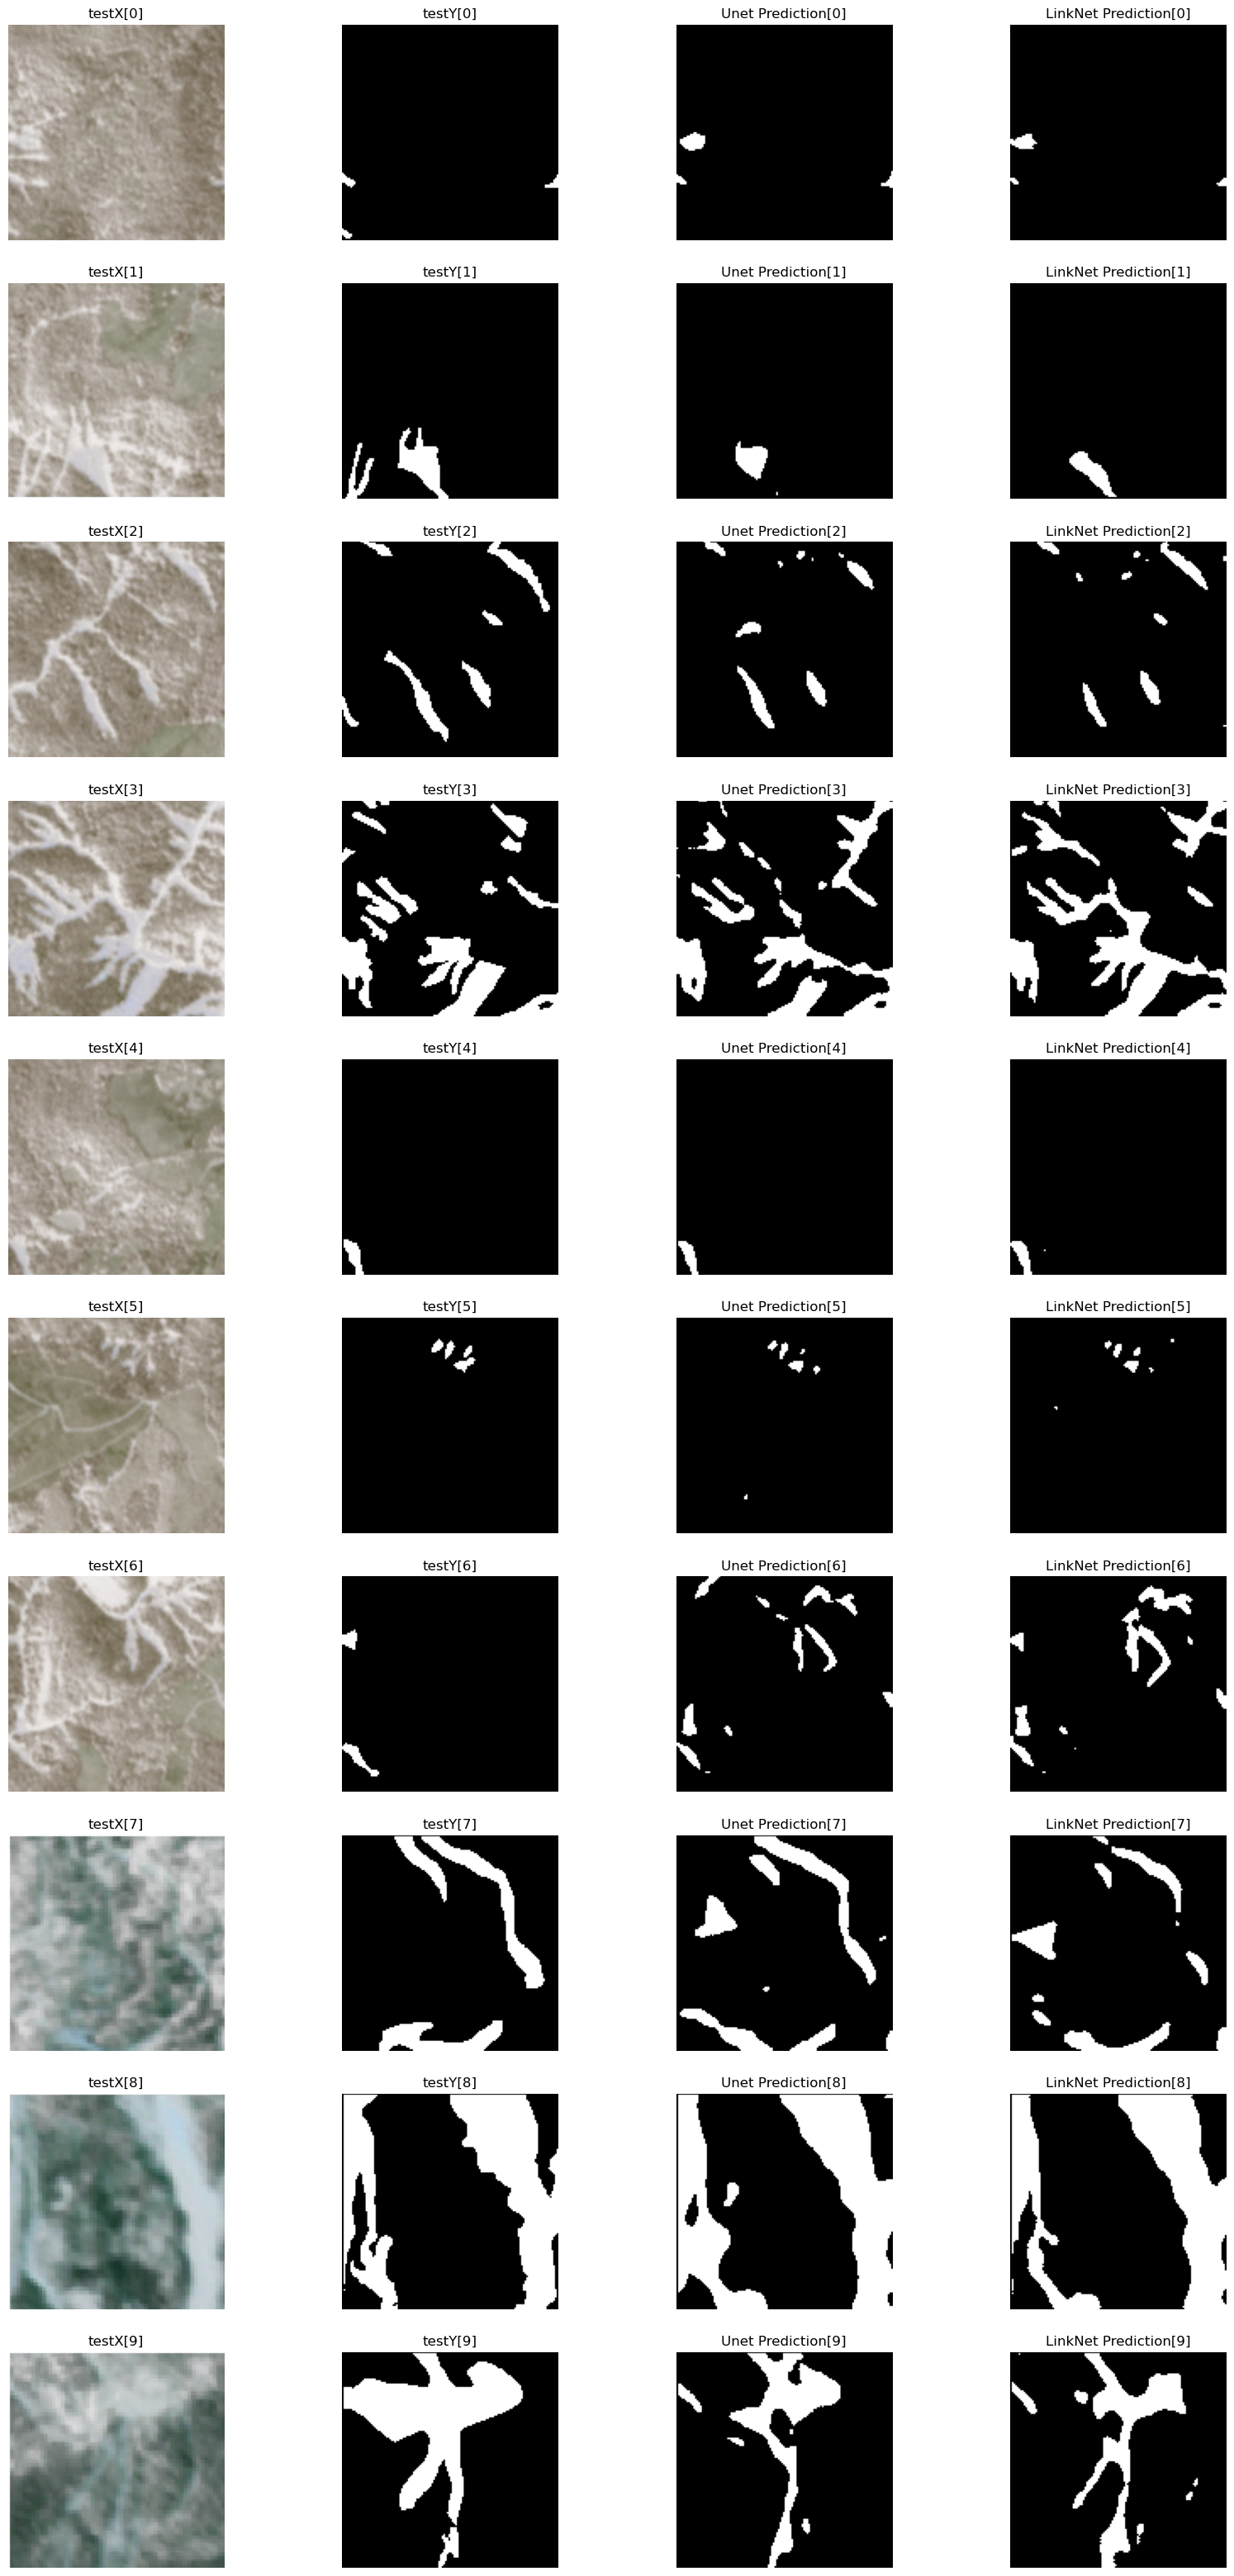

In [25]:
# Plot the first 10 testX vs testY
fig, axes = plt.subplots(10, 4, figsize=(20, 40))

for i in range(10):
    # Plot testX
    axes[i, 0].imshow(testX[i])
    axes[i, 0].set_title(f"testX[{i}]")
    axes[i, 0].axis('off')
    
    # Plot testY
    axes[i, 1].imshow(testY[i].squeeze(), cmap='gray', vmin=0, vmax=1)
    axes[i, 1].set_title(f"testY[{i}]")
    axes[i, 1].axis('off')
    
    # Plot predictions by model (Unet)
    pred_unet = model.predict(testX[i].reshape(1, 128, 128, 4))
    axes[i, 2].imshow((pred_unet.squeeze() > 0.5).astype(int), cmap='gray', vmin=0, vmax=1)
    axes[i, 2].set_title(f"Unet Prediction[{i}]")
    axes[i, 2].axis('off')
    
    # Plot predictions by model 2 (LinkNet)
    pred_linknet = model2.predict(testX[i].reshape(1, 128, 128, 4))
    axes[i, 3].imshow((pred_linknet.squeeze() > 0.5).astype(int), cmap='gray', vmin=0, vmax=1)
    axes[i, 3].set_title(f"LinkNet Prediction[{i}]")
    axes[i, 3].axis('off')

plt.tight_layout()
plt.show()


In [16]:
def attention_unet_model(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))

    # Contraction path
    c1 = attention_block(inputs, 16, 'c1')
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = attention_block(p1, 32, 'c2')
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = attention_block(p2, 64, 'c3')
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = attention_block(p3, 128, 'c4')
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = attention_block(p4, 256, 'c5')

    # Expansive path
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = attention_block(u6, 128, 'c6')

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = attention_block(u7, 64, 'c7')

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = attention_block(u8, 32, 'c8')

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = attention_block(u9, 16, 'c9')

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model3 = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])

    return model3

def attention_block(input_tensor, n_filters, name):
    x = tf.keras.layers.Conv2D(n_filters, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(input_tensor)
    x = tf.keras.layers.Dropout(0.1)(x)
    x = tf.keras.layers.Conv2D(n_filters, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(x)

    # Attention gate
    gate = tf.keras.layers.Conv2D(n_filters, (1, 1), activation='sigmoid', kernel_initializer='he_normal', padding='same')(input_tensor)
    x = tf.keras.layers.multiply([x, gate], name=f'{name}_attention_gate')

    return x

model3 = attention_unet_model(128, 128, 4)
model3.summary()
checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model_attunet.h5", monitor="val_f1_m", verbose=1, save_best_only=True, mode="max")
# earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10, verbose=1, mode='max')

callbacks = [
    # earlyStopping,
    checkpointer
    ]
history = model3.fit(trainX, trainY, batch_size=16,  
          epochs=100, 
          verbose = 2,
          validation_data=(testX, testY),
          callbacks=callbacks)

model3.save("attunetmodel_save.h5")

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 4)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 16)         592       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 128, 128, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 16)         2320      ['dropout[0][0]']             
                                                                                              

C:\Users\goagboola\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


70/70 - 141s - loss: 0.3604 - accuracy: 0.8739 - f1_m: 0.1261 - precision_m: 0.3825 - recall_m: 0.1215 - val_loss: 0.2095 - val_accuracy: 0.9029 - val_f1_m: 0.3698 - val_precision_m: 0.6653 - val_recall_m: 0.2841 - 141s/epoch - 2s/step
Epoch 2/100

Epoch 2: val_f1_m improved from 0.36980 to 0.52708, saving model to best_model_attunet.h5
70/70 - 121s - loss: 0.1954 - accuracy: 0.9138 - f1_m: 0.4075 - precision_m: 0.6793 - recall_m: 0.3302 - val_loss: 0.2046 - val_accuracy: 0.9144 - val_f1_m: 0.5271 - val_precision_m: 0.6872 - val_recall_m: 0.4722 - 121s/epoch - 2s/step
Epoch 3/100

Epoch 3: val_f1_m improved from 0.52708 to 0.59029, saving model to best_model_attunet.h5
70/70 - 119s - loss: 0.1819 - accuracy: 0.9246 - f1_m: 0.5642 - precision_m: 0.6813 - recall_m: 0.5115 - val_loss: 0.1896 - val_accuracy: 0.9186 - val_f1_m: 0.5903 - val_precision_m: 0.6753 - val_recall_m: 0.5751 - 119s/epoch - 2s/step
Epoch 4/100

Epoch 4: val_f1_m improved from 0.59029 to 0.59321, saving model to best_

In [18]:
loss, accuracy, f1_score, precision, recall = model3.evaluate(testX, testY, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.2758669853210449 0.9360224604606628 0.6286094784736633 0.6783537864685059 0.5922021269798279


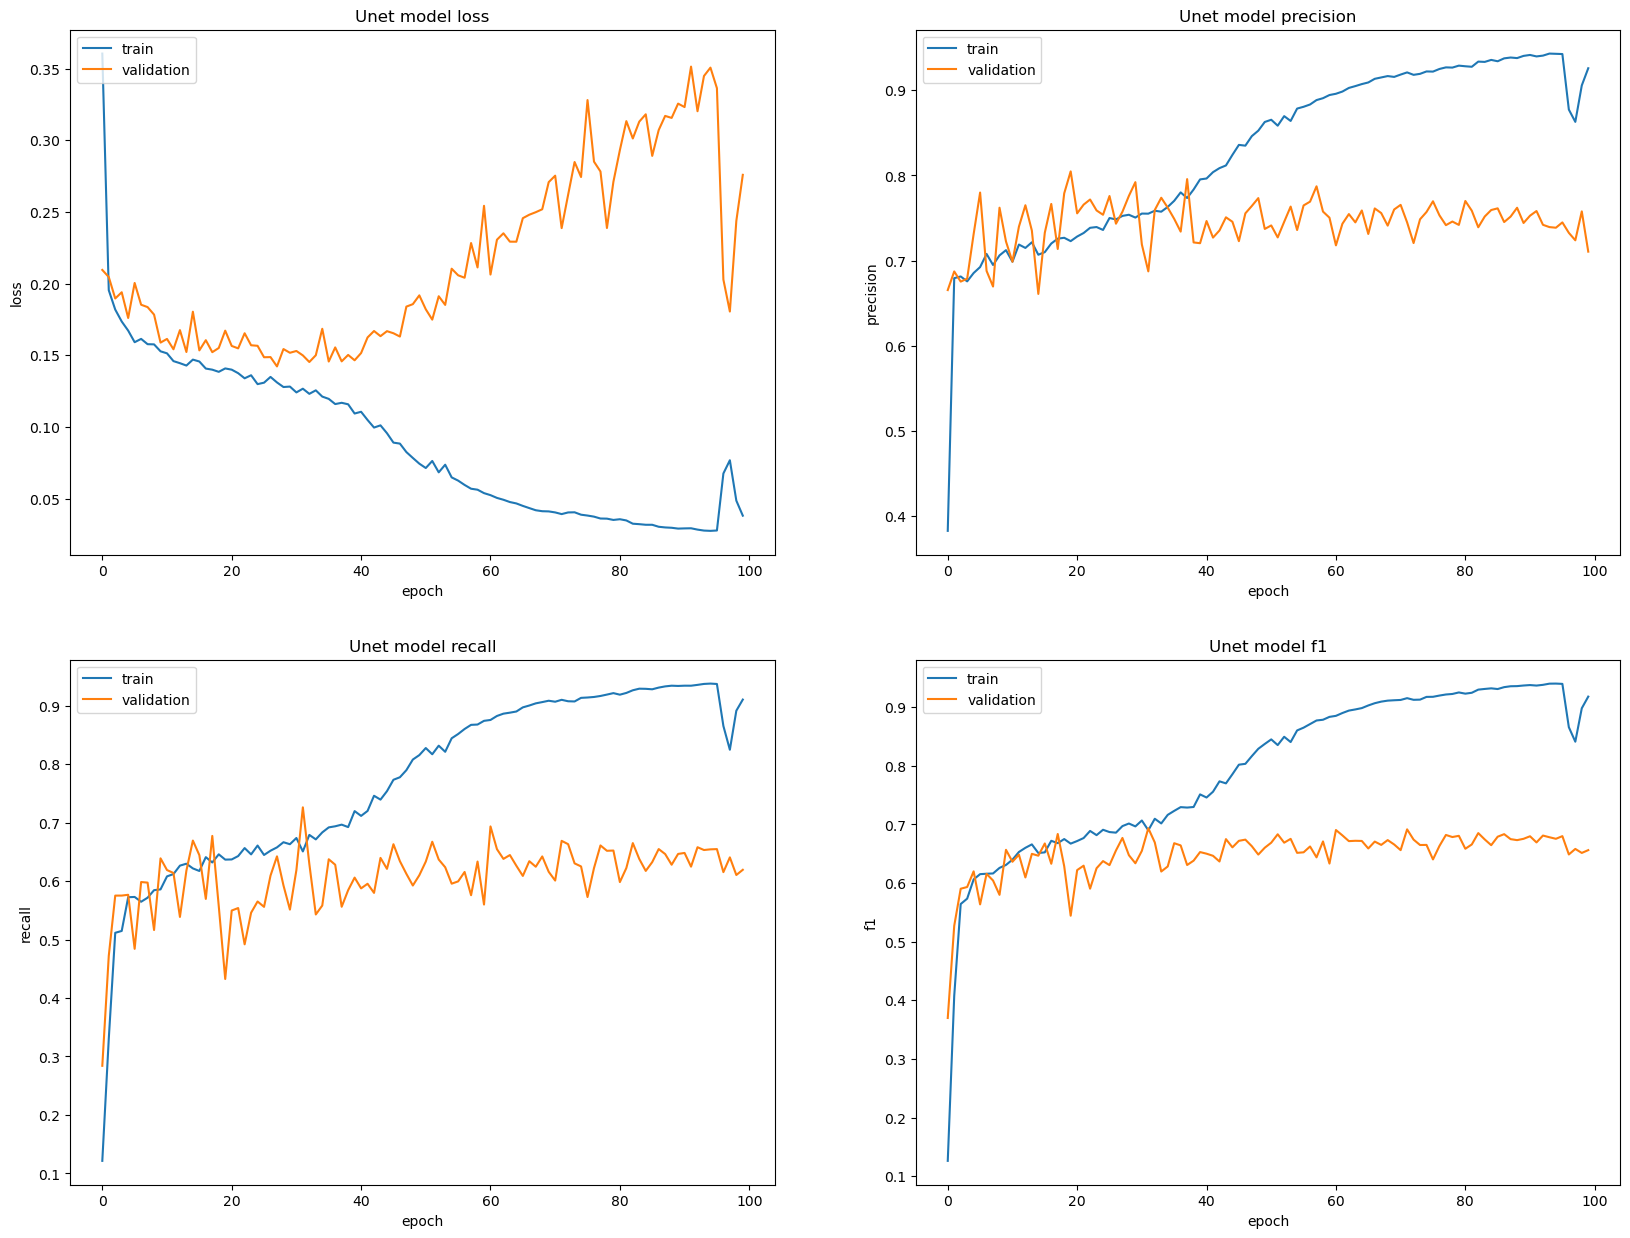

In [19]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline


ig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Unet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('Unet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('Unet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('Unet model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, Concatenate, BatchNormalization

def double_conv_layer(inputs, filters, kernel_size=(3, 3), padding="same", activation="relu"):
    conv = Conv2D(filters, kernel_size, padding=padding, activation=activation)(inputs)
    conv = BatchNormalization()(conv)
    conv = Conv2D(filters, kernel_size, padding=padding, activation=activation)(conv)
    conv = BatchNormalization()(conv)
    return conv

def UNetPlusPlus(input_shape, num_classes):
    inputs = Input(input_shape)

    # Encoder
    conv1 = double_conv_layer(inputs, 64)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = double_conv_layer(pool1, 128)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = double_conv_layer(pool2, 256)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = double_conv_layer(pool3, 512)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    # Bottleneck
    conv5 = double_conv_layer(pool4, 1024)

    # Decoder
    up6 = Concatenate()([UpSampling2D(size=(2, 2))(conv5), conv4])
    conv6 = double_conv_layer(up6, 512)

    up7 = Concatenate()([UpSampling2D(size=(2, 2))(conv6), conv3])
    conv7 = double_conv_layer(up7, 256)

    up8 = Concatenate()([UpSampling2D(size=(2, 2))(conv7), conv2])
    conv8 = double_conv_layer(up8, 128)

    up9 = Concatenate()([UpSampling2D(size=(2, 2))(conv8), conv1])
    conv9 = double_conv_layer(up9, 64)

    output = Conv2D(num_classes, (1, 1), activation="sigmoid")(conv9)

    model4 = tf.keras.Model(inputs=inputs, outputs=output)
    model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])
    return model4

# Example usage:
model4 = UNetPlusPlus(input_shape=(128, 128, 4), num_classes=1)
model4.summary()
checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model_unet++.h5", monitor="val_f1_m", verbose=1, save_best_only=True, mode="max")
# earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10, verbose=1, mode='max')

callbacks = [
    # earlyStopping,
    checkpointer
    ]
history = model4.fit(trainX, trainY, batch_size=16,  
          epochs=100, 
          verbose = 2,
          validation_data=(testX, testY),
          callbacks=callbacks)

model4.save("unet++model_save.h5")


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 128, 128, 4)]        0         []                            
                                                                                                  
 conv2d_123 (Conv2D)         (None, 128, 128, 64)         2368      ['input_7[0][0]']             
                                                                                                  
 batch_normalization_90 (Ba  (None, 128, 128, 64)         256       ['conv2d_123[0][0]']          
 tchNormalization)                                                                                
                                                                                                  
 conv2d_124 (Conv2D)         (None, 128, 128, 64)         36928     ['batch_normalization_90

C:\Users\goagboola\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


70/70 - 727s - loss: 0.4994 - accuracy: 0.8809 - f1_m: 0.5594 - precision_m: 0.4998 - recall_m: 0.7048 - val_loss: 0.6187 - val_accuracy: 0.8808 - val_f1_m: 0.0253 - val_precision_m: 0.1553 - val_recall_m: 0.0158 - 727s/epoch - 10s/step
Epoch 2/100

Epoch 2: val_f1_m did not improve from 0.02527
70/70 - 763s - loss: 0.3259 - accuracy: 0.9226 - f1_m: 0.6219 - precision_m: 0.6140 - recall_m: 0.6485 - val_loss: 0.3934 - val_accuracy: 0.8701 - val_f1_m: 0.0035 - val_precision_m: 0.0042 - val_recall_m: 0.0060 - 763s/epoch - 11s/step
Epoch 3/100

Epoch 3: val_f1_m did not improve from 0.02527
70/70 - 745s - loss: 0.2234 - accuracy: 0.9286 - f1_m: 0.6289 - precision_m: 0.6686 - recall_m: 0.6117 - val_loss: 0.3893 - val_accuracy: 0.8908 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - 745s/epoch - 11s/step
Epoch 4/100

Epoch 4: val_f1_m improved from 0.02527 to 0.03539, saving model to best_model_unet++.h5
70/70 - 726s - loss: 0.1852 - accuracy: 0.9317 - f1_m: 

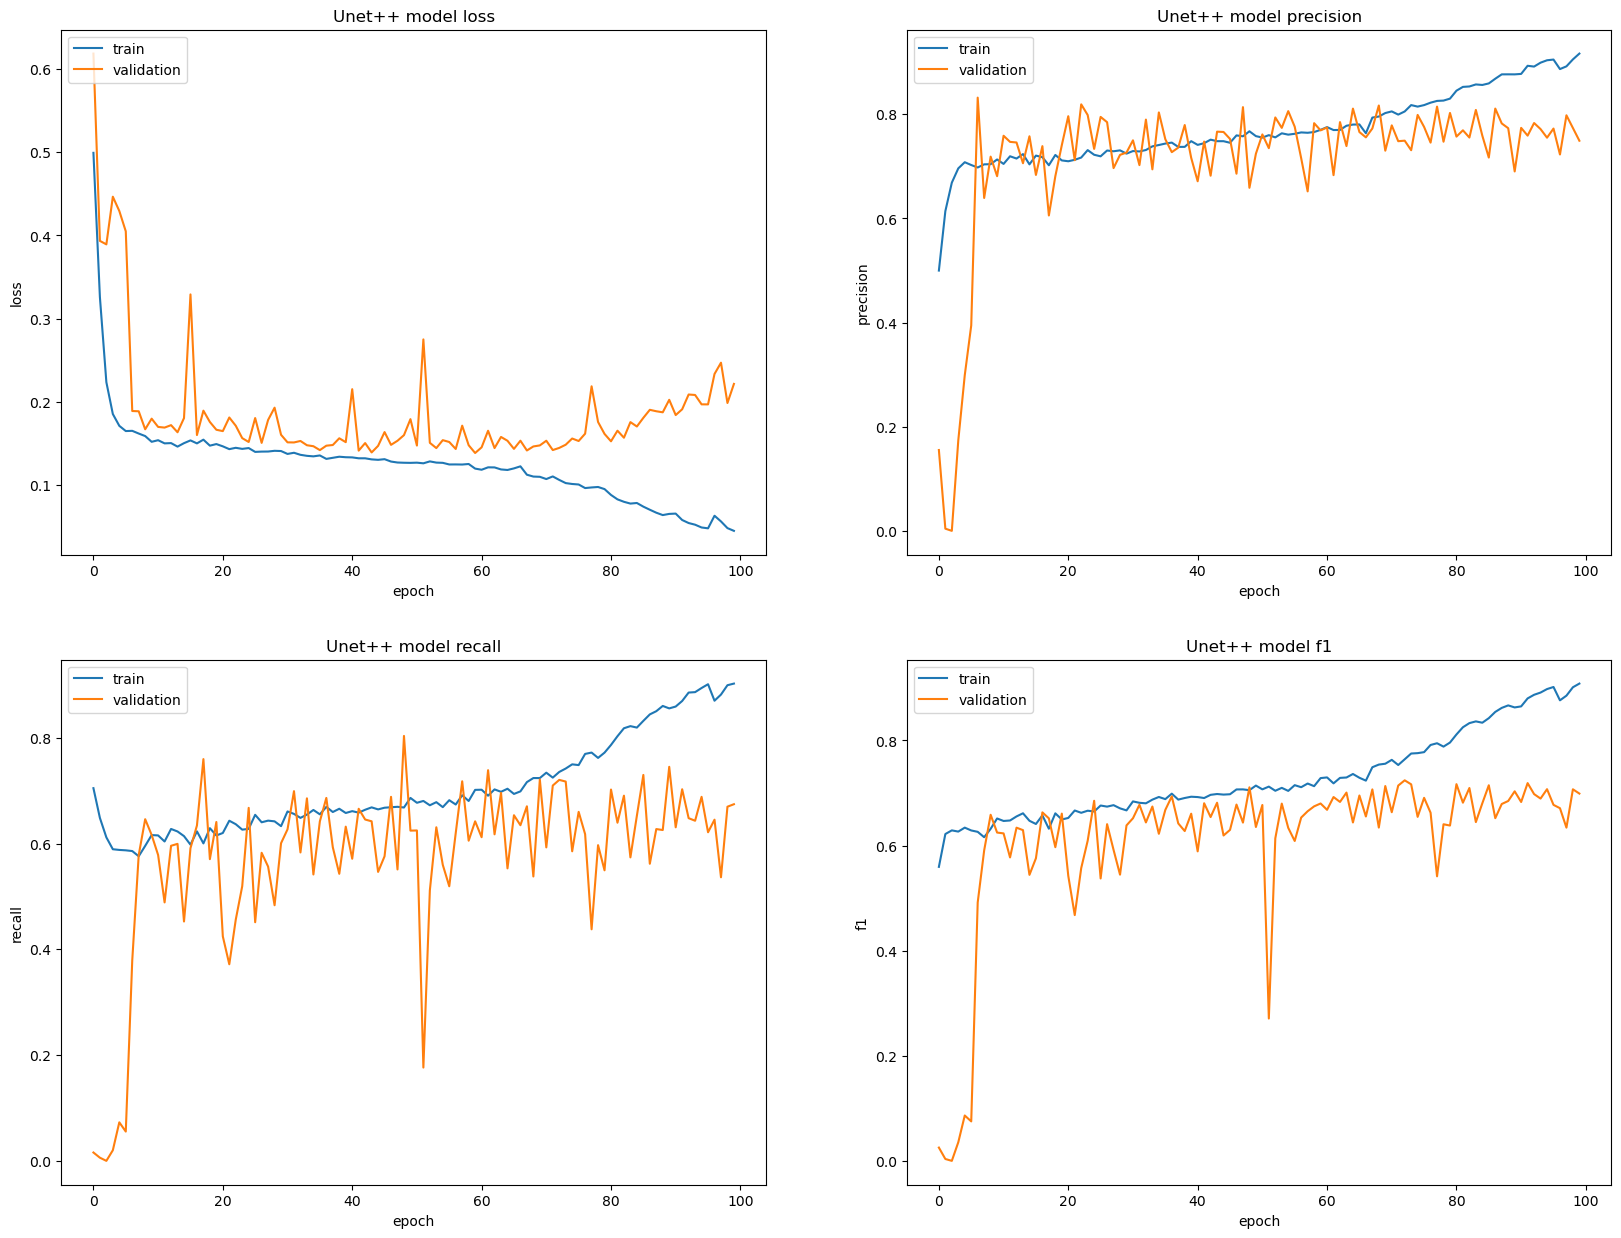

In [39]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline


ig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Unet++ model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('Unet++ model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('Unet++ model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('Unet++ model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

In [59]:
import tensorflow as tf

def transformer_block(inputs, num_heads, ff_dim, dropout_rate):
    attn_output = tf.keras.layers.MultiHeadAttention(
        num_heads=num_heads, key_dim=num_heads, dropout=dropout_rate
    )(inputs, inputs)
    attn_output = tf.keras.layers.Dropout(dropout_rate)(attn_output)
    out1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(inputs + attn_output)
    
    ffn_output = tf.keras.layers.Dense(ff_dim, activation="relu")(out1)
    ffn_output = tf.keras.layers.Dense(inputs.shape[-1])(ffn_output)
    ffn_output = tf.keras.layers.Dropout(dropout_rate)(ffn_output)
    out2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(out1 + ffn_output)
    return out2

def encoder_layer(inputs, num_heads, ff_dim, dropout_rate, positions):
    # Add position embeddings
    inputs = tf.keras.layers.Add()([inputs, positions])

    # Transformer blocks
    x = transformer_block(inputs, num_heads, ff_dim, dropout_rate)
    return x

def decoder_layer(inputs, skip, filters):
    up = tf.keras.layers.Conv2DTranspose(filters, (2, 2), strides=(2, 2), padding='same')(inputs)
    concat = tf.keras.layers.concatenate([up, skip])
    conv = tf.keras.layers.Conv2D(filters, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(concat)
    conv = tf.keras.layers.Dropout(0.1)(conv)
    conv = tf.keras.layers.Conv2D(filters, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv)
    return conv

def segformer_model(img_width, img_height, img_channels, num_classes=1, num_heads=4, ff_dim=512, dropout_rate=0.1):
    inputs = tf.keras.layers.Input((img_width, img_height, img_channels))
    # Generate position embeddings
    input_shape = tf.shape(inputs)
    token_size = input_shape[1] * input_shape[2]
    positions = tf.range(start=0, limit=token_size, delta=1)
    position_embeddings = tf.keras.layers.Embedding(
        input_dim=token_size, output_dim=inputs.shape[-1]
    )(positions)
    position_embeddings = tf.reshape(position_embeddings, [1, input_shape[1], input_shape[2], inputs.shape[-1]])

    # Encoder
    c1 = encoder_layer(inputs, num_heads, ff_dim, dropout_rate, position_embeddings)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)
    c2 = encoder_layer(p1, num_heads, ff_dim, dropout_rate, position_embeddings)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
    c3 = encoder_layer(p2, num_heads, ff_dim, dropout_rate, position_embeddings)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
    c4 = encoder_layer(p3, num_heads, ff_dim, dropout_rate, position_embeddings)
    p4 = tf.keras.layers.MaxPooling2D((2, 2))(c4)
    c5 = encoder_layer(p4, num_heads, ff_dim, dropout_rate, position_embeddings)

    # Decoder
    u6 = decoder_layer(c5, c4, 128)
    u7 = decoder_layer(u6, c3, 64)
    u8 = decoder_layer(u7, c2, 32)
    u9 = decoder_layer(u8, c1, 16)

    outputs = tf.keras.layers.Conv2D(num_classes, (1, 1), activation='sigmoid')(u9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy' if num_classes == 1 else 'categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Example usage:
model = segformer_model(128, 128, 4)
model.summary()

# Assuming you have training and testing data trainX, trainY, testX, testY
history = model.fit(trainX, trainY, batch_size=16,  
                    epochs=10, 
                    verbose=2,
                    validation_data=(testX, testY))



TypeError: Keras symbolic inputs/outputs do not implement `__len__`. You may be trying to pass Keras symbolic inputs/outputs to a TF API that does not register dispatching, preventing Keras from automatically converting the API call to a lambda layer in the Functional Model. This error will also get raised if you try asserting a symbolic input/output directly.

In [11]:
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras import backend as K

# Define the custom metric functions
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Load the model with custom metric functions
linknet_model = load_model('best_model_test_0.74.h5', custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})
unet_model = load_model('best_model_unet.h5', custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})
unetatt_model = load_model('best_model_attunet.h5', custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})
unetplusplus_model = load_model('best_model_unet++.h5', custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})
unetlight_model = load_model('best_model_test_0.73.h5', custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})

In [10]:
from tensorflow.keras import backend
from tensorflow.keras import layers

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

def precision_m(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision

def recall_m(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall

def channel_attention(input_tensor, ratio=8):
    channel_axis = 1 if backend.image_data_format() == 'channels_first' else -1
    channel = input_tensor.shape[channel_axis]

    shared_layer_one = layers.Dense(channel // ratio, activation='relu', kernel_initializer='he_normal', use_bias=True, bias_initializer='zeros')
    shared_layer_two = layers.Dense(channel, activation='sigmoid', kernel_initializer='he_normal', use_bias=True, bias_initializer='zeros')

    avg_pool = layers.GlobalAveragePooling2D()(input_tensor)
    avg_pool = layers.Reshape((1, 1, channel))(avg_pool)
    avg_pool = shared_layer_one(avg_pool)
    avg_pool = shared_layer_two(avg_pool)

    max_pool = layers.GlobalMaxPooling2D()(input_tensor)
    max_pool = layers.Reshape((1, 1, channel))(max_pool)
    max_pool = shared_layer_one(max_pool)
    max_pool = shared_layer_two(max_pool)

    channel_attention_feature = layers.Add()([avg_pool, max_pool])
    channel_attention_feature = layers.Multiply()([input_tensor, channel_attention_feature])

    return channel_attention_feature

def build_lightweight_attention_unet(input_shape):
    inputs = tf.keras.Input(shape=input_shape)

    # Encoder
    enc_conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    enc_pool1 = layers.MaxPooling2D(pool_size=(2, 2))(enc_conv1)
    enc_conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(enc_pool1)
    enc_pool2 = layers.MaxPooling2D(pool_size=(2, 2))(enc_conv2)
    enc_conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(enc_pool2)
    enc_pool3 = layers.MaxPooling2D(pool_size=(2, 2))(enc_conv3)

    # Bottleneck
    bottleneck_conv = layers.Conv2D(512, 3, activation='relu', padding='same')(enc_pool3)

    # Attention mechanism
    attention = layers.Conv2D(64, 1, activation='sigmoid')(bottleneck_conv)
    adjusted_attention = layers.Conv2D(256, 1, activation='sigmoid')(attention)
    upsampled_attention = layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(adjusted_attention)
    attended_features = layers.Multiply()([enc_conv3, upsampled_attention])

    # Channel Attention
    channel_attended_features = channel_attention(attended_features)

    # Decoder
    dec_upsamp1 = layers.Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(channel_attended_features)
    dec_concat1 = layers.Concatenate()([dec_upsamp1, enc_conv2])
    dec_conv1 = layers.Conv2D(128, 3, activation='relu', padding='same')(dec_concat1)
    dec_upsamp2 = layers.Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(dec_conv1)
    dec_concat2 = layers.Concatenate()([dec_upsamp2, enc_conv1])
    dec_conv2 = layers.Conv2D(64, 3, activation='relu', padding='same')(dec_concat2)
    outputs = layers.Conv2D(1, 1, activation='sigmoid')(dec_conv2)

    model = tf.keras.Model(inputs=inputs, outputs=outputs, name='lightweight_attention_unet')
    return model

# Instantiate the model
input_shape = (128, 128, 4)
model5 = build_lightweight_attention_unet(input_shape)

# Compile the model
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])

# Display model summary
model5.summary()

# Set up callbacks
checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model_lattunet_test_{val_f1_m:.2f}.h5", monitor="val_f1_m", verbose=1, save_best_only=True, mode="max")
callbacks = [checkpointer]

# Training
history = model2.fit(trainX, trainY, batch_size=16,  
                    epochs=100, 
                    verbose=2,
                    validation_data=(testX, testY),
                    callbacks=callbacks)

# Save the model
model5.save("lightweight_attention_unet_model.h5")



Model: "lightweight_attention_unet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 128, 128, 4)]        0         []                            
                                                                                                  
 conv2d_36 (Conv2D)          (None, 128, 128, 64)         2368      ['input_7[0][0]']             
                                                                                                  
 max_pooling2d_18 (MaxPooli  (None, 64, 64, 64)           0         ['conv2d_36[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 conv2d_37 (Conv2D)          (None, 64, 64, 128)          73856     ['max

C:\Users\goagboola\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_f1_m improved from 0.69062 to 0.69768, saving model to best_model_lattunet_test_0.70.h5
70/70 - 248s - loss: 0.0401 - accuracy: 0.9836 - f1_m: 0.9168 - precision_m: 0.9234 - recall_m: 0.9115 - val_loss: 0.2648 - val_accuracy: 0.9376 - val_f1_m: 0.6977 - val_precision_m: 0.7392 - val_recall_m: 0.6798 - 248s/epoch - 4s/step
Epoch 3/100

Epoch 3: val_f1_m did not improve from 0.69768
70/70 - 270s - loss: 0.0408 - accuracy: 0.9833 - f1_m: 0.9159 - precision_m: 0.9216 - recall_m: 0.9112 - val_loss: 0.2860 - val_accuracy: 0.9363 - val_f1_m: 0.6767 - val_precision_m: 0.7555 - val_recall_m: 0.6280 - 270s/epoch - 4s/step
Epoch 4/100

Epoch 4: val_f1_m did not improve from 0.69768
70/70 - 276s - loss: 0.0379 - accuracy: 0.9844 - f1_m: 0.9219 - precision_m: 0.9276 - recall_m: 0.9169 - val_loss: 0.2901 - val_accuracy: 0.9389 - val_f1_m: 0.6945 - val_precision_m: 0.7499 - val_recall_m: 0.6688 - 276s/epoch - 4s/step
Epoch 5/100

Epoch 5: val_f1_m did not improve from 0.69768
70/70 - 26

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 [==============================] - 0s 137ms/step


 10%|█         | 1/10 [00:01<00:10,  1.18s/it]

1/1 [==============================] - 0s 135ms/step


 20%|██        | 2/10 [00:02<00:09,  1.17s/it]

1/1 [==============================] - 0s 132ms/step


 30%|███       | 3/10 [00:03<00:08,  1.17s/it]

1/1 [==============================] - 0s 136ms/step


 40%|████      | 4/10 [00:04<00:07,  1.17s/it]

1/1 [==============================] - 0s 133ms/step


 50%|█████     | 5/10 [00:05<00:05,  1.17s/it]

1/1 [==============================] - 0s 137ms/step


 60%|██████    | 6/10 [00:07<00:04,  1.18s/it]

1/1 [==============================] - 0s 134ms/step


 70%|███████   | 7/10 [00:08<00:03,  1.17s/it]

1/1 [==============================] - 0s 136ms/step


 80%|████████  | 8/10 [00:09<00:02,  1.17s/it]

1/1 [==============================] - 0s 142ms/step


 90%|█████████ | 9/10 [00:10<00:01,  1.17s/it]

1/1 [==============================] - 0s 134ms/step


100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


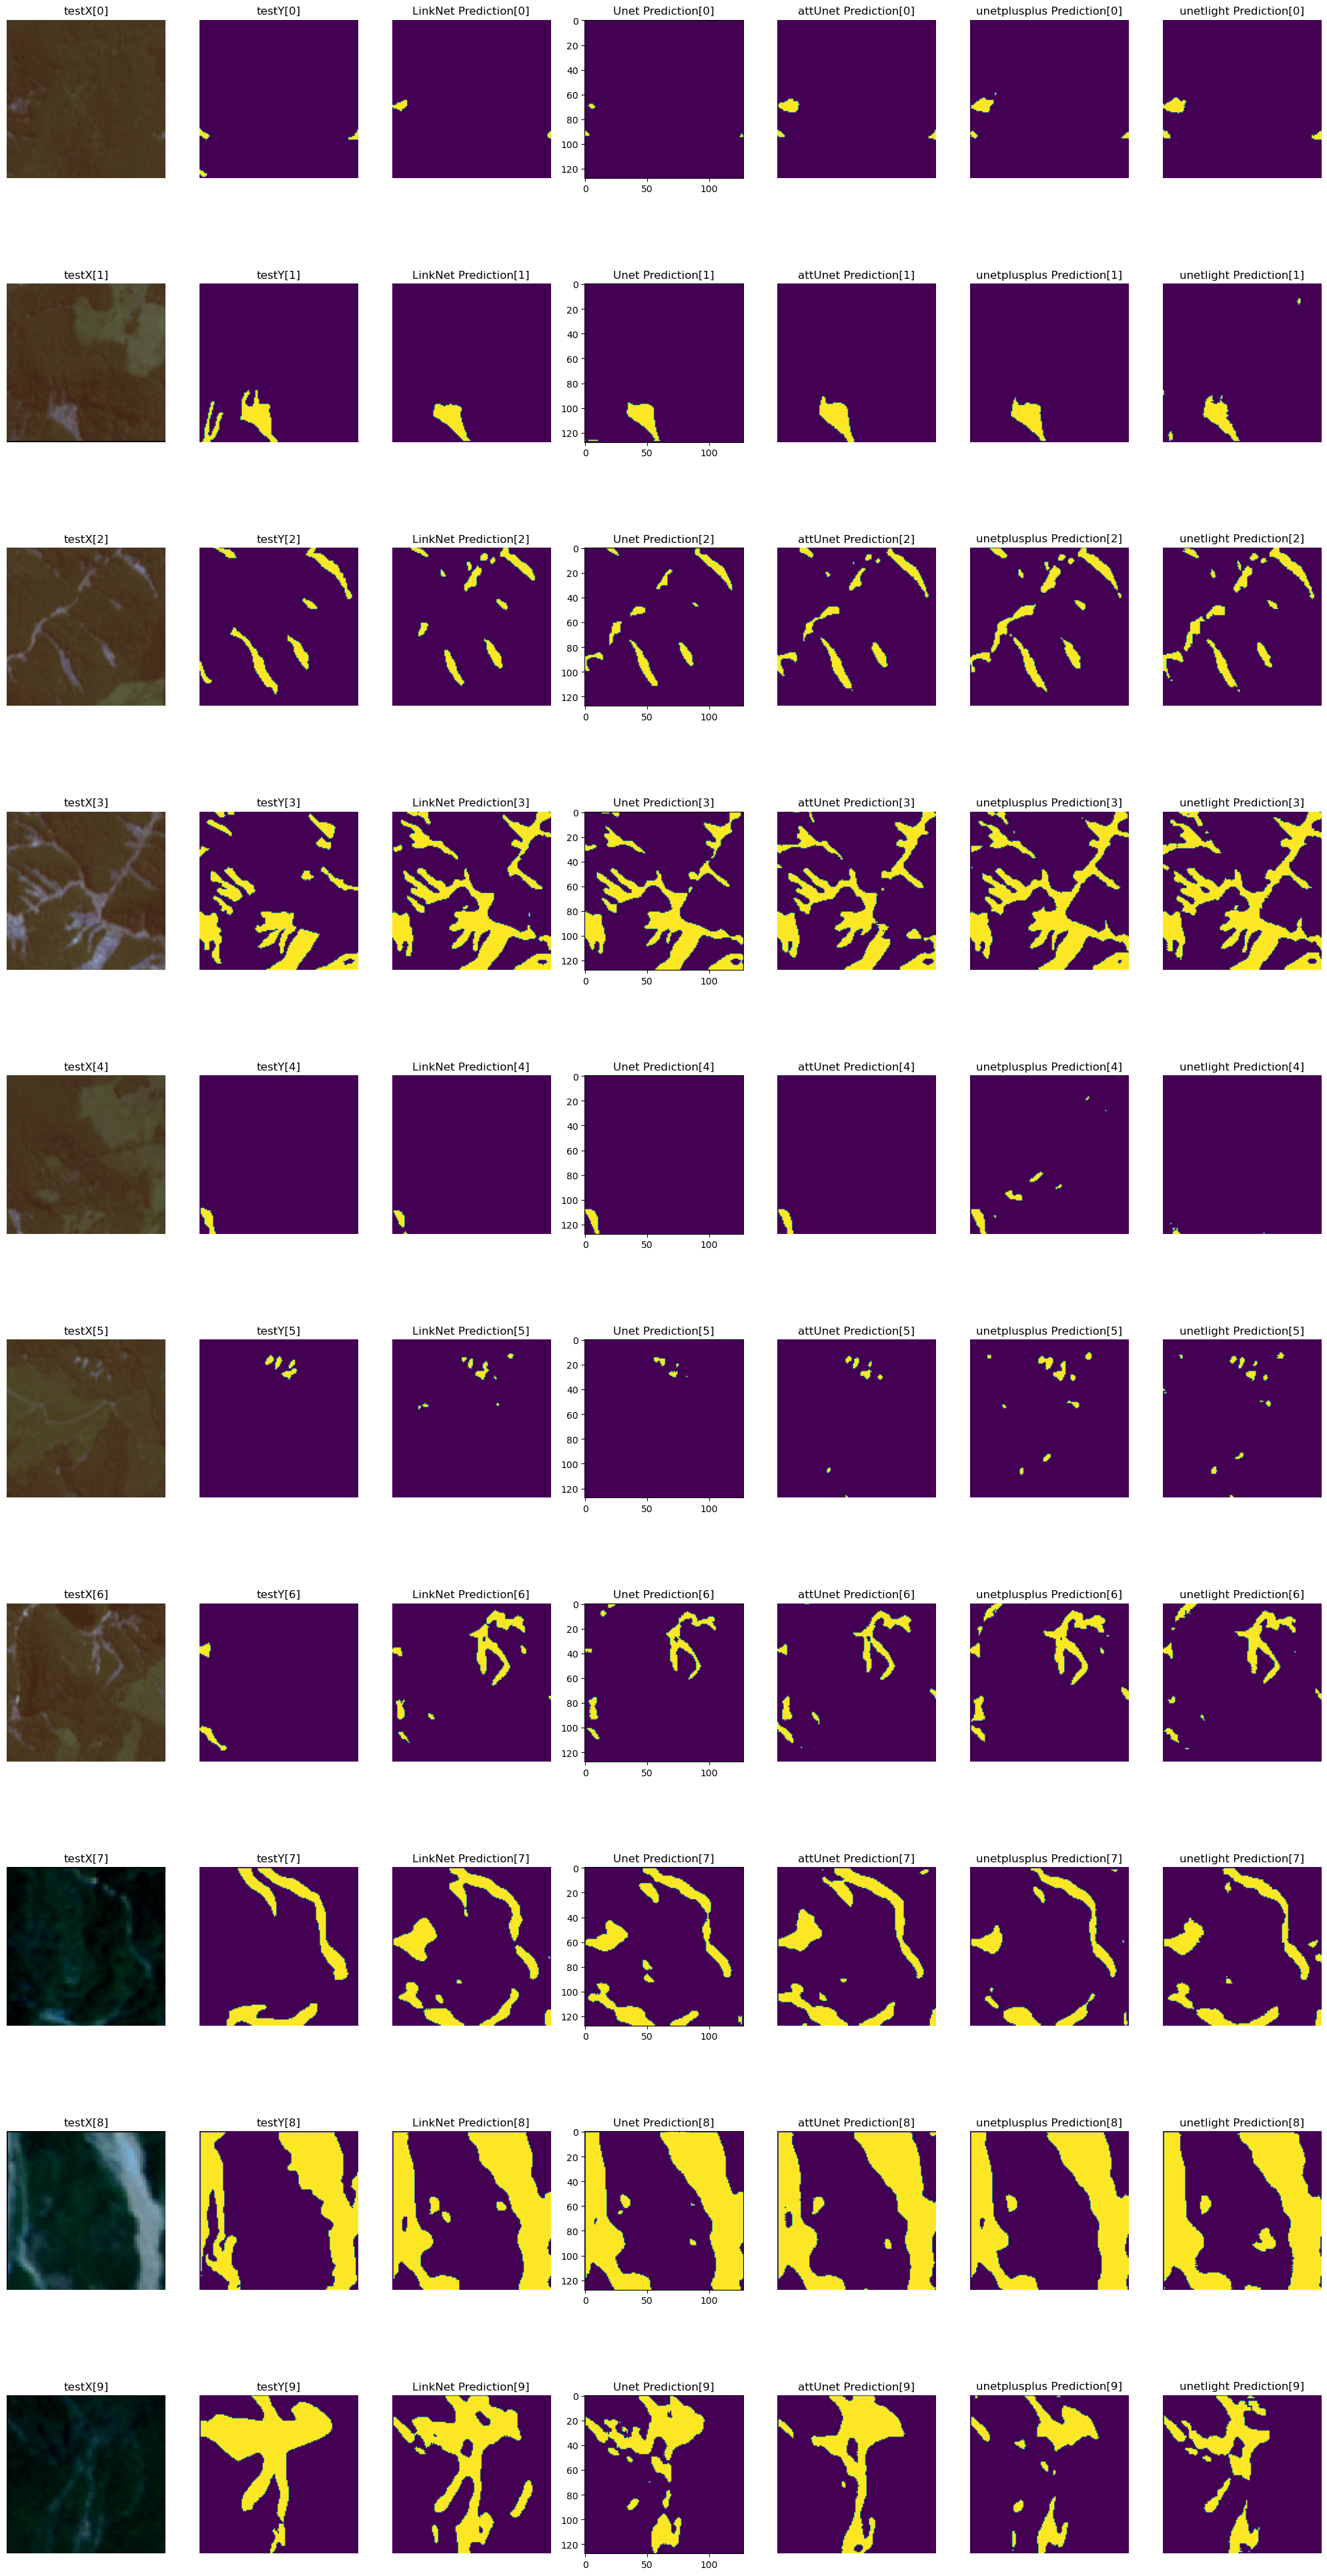

In [13]:
from tqdm import tqdm
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 7, figsize=(20, 40))

for i in tqdm(range(10)):
    axes[i, 0].imshow(testX[i][:, :, :3])
    axes[i, 0].set_title(f'testX[{i}]')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(testY[i])
    axes[i, 1].set_title(f'testY[{i}]')
    axes[i, 1].axis('off')

    axes[i, 2].imshow(linknet_model.predict(testX[i:i+1])[0, :, :, 0] > 0.5)
    axes[i, 2].set_title(f'LinkNet Prediction[{i}]')
    axes[i, 2].axis('off')

    axes[i, 3].imshow(unetatt_model.predict(testX[i:i+1])[0, :, :, 0] > 0.5)
    axes[i, 3].set_title(f'Unet Prediction[{i}]')

    axes[i, 4].imshow(unet_model.predict(testX[i:i+1])[0, :, :, 0] > 0.5)
    axes[i, 4].set_title(f'attUnet Prediction[{i}]')
    axes[i, 4].axis('off')

    axes[i, 5].imshow(unetplusplus_model.predict(testX[i:i+1])[0, :, :, 0] > 0.5)
    axes[i, 5].set_title(f'unetplusplus Prediction[{i}]')
    axes[i, 5].axis('off')

    axes[i, 6].imshow(unetlight_model.predict(testX[i:i+1])[0, :, :, 0] > 0.5)
    axes[i, 6].set_title(f'unetlight Prediction[{i}]')
    axes[i, 6].axis('off')

plt.tight_layout()
plt.show()


In [6]:
linknet_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 4)]        0         []                            
                                                                                                  
 conv2d_18 (Conv2D)          (None, 128, 128, 64)         2368      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_17 (Ba  (None, 128, 128, 64)         256       ['conv2d_18[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_17 (Activation)  (None, 128, 128, 64)         0         ['batch_normalization_17

In [16]:
unetlight_model.summary()

Model: "lightweight_attention_unet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 128, 128, 4)]        0         []                            
                                                                                                  
 conv2d_27 (Conv2D)          (None, 128, 128, 64)         2368      ['input_6[0][0]']             
                                                                                                  
 max_pooling2d_15 (MaxPooli  (None, 64, 64, 64)           0         ['conv2d_27[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 conv2d_28 (Conv2D)          (None, 64, 64, 128)          73856     ['max

## Models Performance on the test dataset

12/12 [==============================] - 24s 2s/step - loss: 0.1519 - accuracy: 0.9352 - f1_m: 0.7264 - precision_m: 0.7044 - recall_m: 0.7653


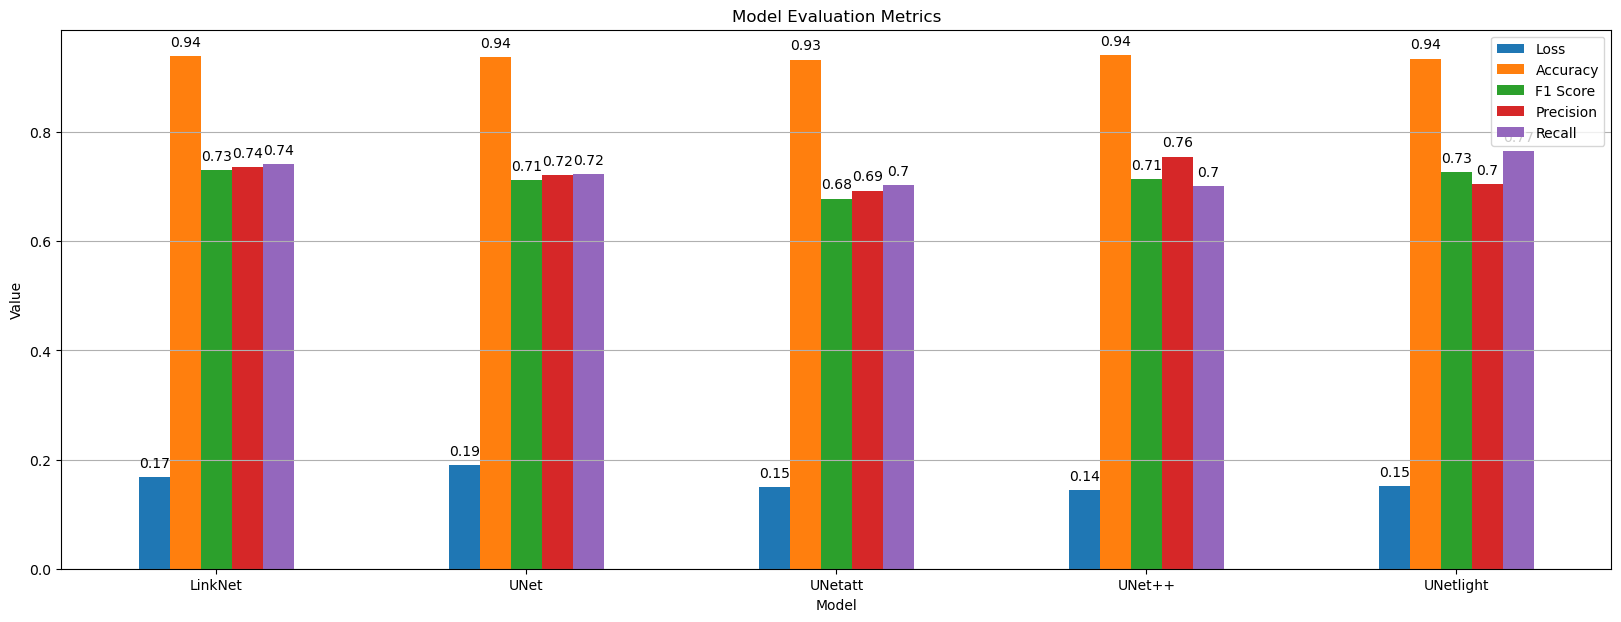

In [17]:
import pandas as pd
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

# Define the custom metric functions
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Load the LinkNet model with custom metric functions
linknet_model = load_model('best_model_test_0.74.h5', custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})

# Load the UNet model with custom metric functions
unet_model = load_model('best_model_unet.h5', custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})

# Load the UNet model with custom metric functions
unetatt_model = load_model('best_model_attunet.h5', custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})

# Load the UNet model with custom metric functions
unetplusplus_model = load_model('best_model_unet++.h5', custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})

# Load the UNetlight model with custom metric functions
unetlight_model_model = load_model('best_model_test_0.73.h5', custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})

# Evaluate LinkNet model
linknet_loss, linknet_accuracy, linknet_f1_score, linknet_precision, linknet_recall = linknet_model.evaluate(testX, testY)

# Evaluate UNet model
unet_loss, unet_accuracy, unet_f1_score, unet_precision, unet_recall = unet_model.evaluate(testX, testY)

unetatt_loss, unetatt_accuracy, unetatt_f1_score, unetatt_precision, unetatt_recall = unetatt_model.evaluate(testX, testY)

unetplusplus_loss, unetplusplus_accuracy, unetplusplus_f1_score, unetplusplus_precision, unetplusplus_recall = unetplusplus_model.evaluate(testX, testY)

unetlight_loss, unetlight_accuracy, unetlight_f1_score, unetlight_precision, unetlight_recall = unetlight_model.evaluate(testX, testY)
# Create dictionaries with the metrics for LinkNet and UNet
linknet_metrics = {
    'Model': ['LinkNet'],
    'Loss': [linknet_loss],
    'Accuracy': [linknet_accuracy],
    'F1 Score': [linknet_f1_score],
    'Precision': [linknet_precision],
    'Recall': [linknet_recall]
}

unet_metrics = {
    'Model': ['UNet'],
    'Loss': [unet_loss],
    'Accuracy': [unet_accuracy],
    'F1 Score': [unet_f1_score],
    'Precision': [unet_precision],
    'Recall': [unet_recall]

}

unetatt_metrics = {
    'Model': ['UNetatt'],
    'Loss': [unetatt_loss],
    'Accuracy': [unetatt_accuracy],
    'F1 Score': [unetatt_f1_score],
    'Precision': [unetatt_precision],
    'Recall': [unetatt_recall]

}

unetplusplus_metrics = {
    'Model': ['UNet++'],
    'Loss': [unetplusplus_loss],
    'Accuracy': [unetplusplus_accuracy],
    'F1 Score': [unetplusplus_f1_score],
    'Precision': [unetplusplus_precision],
    'Recall': [unetplusplus_recall]
}
unetlight_metrics = {
    'Model': ['UNetlight'],
    'Loss': [unetlight_loss],
    'Accuracy': [unetlight_accuracy],
    'F1 Score': [unetlight_f1_score],
    'Precision': [unetlight_precision],
    'Recall': [unetlight_recall]

}

# Create dataframes from the metrics dictionaries
df_linknet_metrics = pd.DataFrame(linknet_metrics)
df_unet_metrics = pd.DataFrame(unet_metrics)
df_unetatt_metrics = pd.DataFrame(unetatt_metrics)
df_unetplusplus_metrics = pd.DataFrame(unetplusplus_metrics)

df_unetlight_metrics = pd.DataFrame(unetlight_metrics)
# Concatenate the dataframes
df_metrics = pd.concat([df_linknet_metrics, df_unet_metrics,df_unetatt_metrics,df_unetplusplus_metrics, df_unetlight_metrics ])

# Plot the metrics
ax = df_metrics.plot(x='Model', y=['Loss', 'Accuracy', 'F1 Score', 'Precision', 'Recall'], kind='bar', figsize=(20, 7))

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Model Evaluation Metrics')
plt.xlabel('Model')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()


In [18]:
df_metrics

Model      Loss  Accuracy  F1 Score  Precision    Recall
0    LinkNet  0.167844  0.940079  0.730731   0.736409  0.741265
0       UNet  0.190148  0.937764  0.712892   0.721376  0.723672
0    UNetatt  0.149927  0.933222  0.678180   0.693069  0.703583
0     UNet++  0.144422  0.940919  0.713613   0.755227  0.701037
0  UNetlight  0.151880  0.935192  0.726371   0.704425  0.765263

## Model Performance on the training dataset

35/35 [==============================] - 75s 2s/step - loss: 0.1205 - accuracy: 0.9477 - f1_m: 0.7617 - precision_m: 0.7059 - recall_m: 0.8338


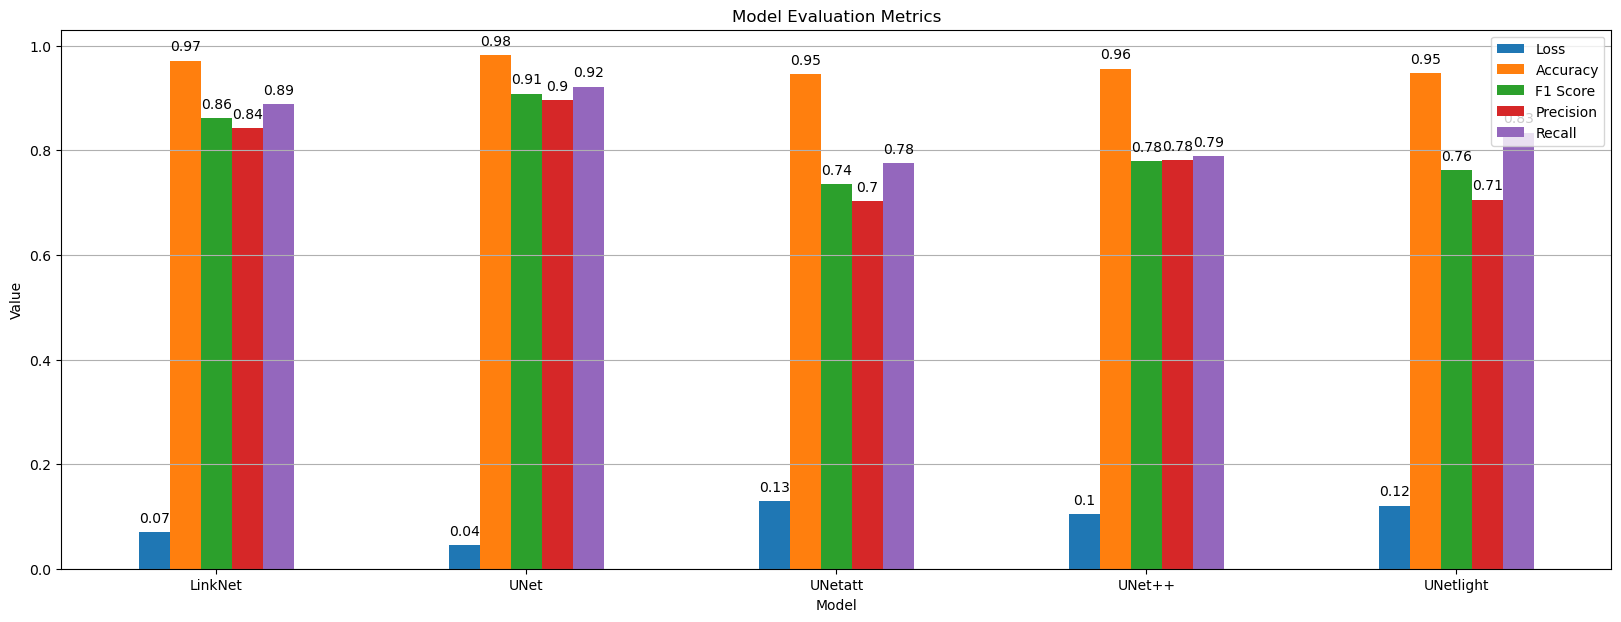

In [27]:
import pandas as pd
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

# Define the custom metric functions
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Load the LinkNet model with custom metric functions
linknet_model = load_model('best_model_test_0.74.h5', custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})

# Load the UNet model with custom metric functions
unet_model = load_model('best_model_unet.h5', custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})

# Load the UNet model with custom metric functions
unetatt_model = load_model('best_model_attunet.h5', custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})

# Load the UNet model with custom metric functions
unetplusplus_model = load_model('best_model_unet++.h5', custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})

# Load the UNetlight model with custom metric functions
unetlight_model_model = load_model('best_model_test_0.73.h5', custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})

# Evaluate LinkNet model
linknet_loss, linknet_accuracy, linknet_f1_score, linknet_precision, linknet_recall = linknet_model.evaluate(trainX, trainY)

# Evaluate UNet model
unet_loss, unet_accuracy, unet_f1_score, unet_precision, unet_recall = unet_model.evaluate(trainX, trainY)

unetatt_loss, unetatt_accuracy, unetatt_f1_score, unetatt_precision, unetatt_recall = unetatt_model.evaluate(trainX, trainY)

unetplusplus_loss, unetplusplus_accuracy, unetplusplus_f1_score, unetplusplus_precision, unetplusplus_recall = unetplusplus_model.evaluate(trainX, trainY)

unetlight_loss, unetlight_accuracy, unetlight_f1_score, unetlight_precision, unetlight_recall = unetlight_model.evaluate(trainX, trainY)
# Create dictionaries with the metrics for LinkNet and UNet
linknet_metrics = {
    'Model': ['LinkNet'],
    'Loss': [linknet_loss],
    'Accuracy': [linknet_accuracy],
    'F1 Score': [linknet_f1_score],
    'Precision': [linknet_precision],
    'Recall': [linknet_recall]
}

unet_metrics = {
    'Model': ['UNet'],
    'Loss': [unet_loss],
    'Accuracy': [unet_accuracy],
    'F1 Score': [unet_f1_score],
    'Precision': [unet_precision],
    'Recall': [unet_recall]

}

unetatt_metrics = {
    'Model': ['UNetatt'],
    'Loss': [unetatt_loss],
    'Accuracy': [unetatt_accuracy],
    'F1 Score': [unetatt_f1_score],
    'Precision': [unetatt_precision],
    'Recall': [unetatt_recall]

}

unetplusplus_metrics = {
    'Model': ['UNet++'],
    'Loss': [unetplusplus_loss],
    'Accuracy': [unetplusplus_accuracy],
    'F1 Score': [unetplusplus_f1_score],
    'Precision': [unetplusplus_precision],
    'Recall': [unetplusplus_recall]
}
unetlight_metrics = {
    'Model': ['UNetlight'],
    'Loss': [unetlight_loss],
    'Accuracy': [unetlight_accuracy],
    'F1 Score': [unetlight_f1_score],
    'Precision': [unetlight_precision],
    'Recall': [unetlight_recall]

}

# Create dataframes from the metrics dictionaries
df_linknet_metrics = pd.DataFrame(linknet_metrics)
df_unet_metrics = pd.DataFrame(unet_metrics)
df_unetatt_metrics = pd.DataFrame(unetatt_metrics)
df_unetplusplus_metrics = pd.DataFrame(unetplusplus_metrics)

df_unetlight_metrics = pd.DataFrame(unetlight_metrics)
# Concatenate the dataframes
df_metrics_train = pd.concat([df_linknet_metrics, df_unet_metrics,df_unetatt_metrics,df_unetplusplus_metrics, df_unetlight_metrics ])

# Plot the metrics
ax = df_metrics_train.plot(x='Model', y=['Loss', 'Accuracy', 'F1 Score', 'Precision', 'Recall'], kind='bar', figsize=(20, 7))

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Model Evaluation Metrics')
plt.xlabel('Model')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()


In [28]:
#Taining data model evaluation metrics performance
df_metrics_train

Model      Loss  Accuracy  F1 Score  Precision    Recall
0    LinkNet  0.069936  0.971494  0.861480   0.842283  0.887680
0       UNet  0.044565  0.981525  0.908368   0.895729  0.921644
0    UNetatt  0.128819  0.945062  0.735471   0.702335  0.775697
0     UNet++  0.104984  0.956295  0.779539   0.781269  0.788418
0  UNetlight  0.120459  0.947726  0.761657   0.705854  0.833774

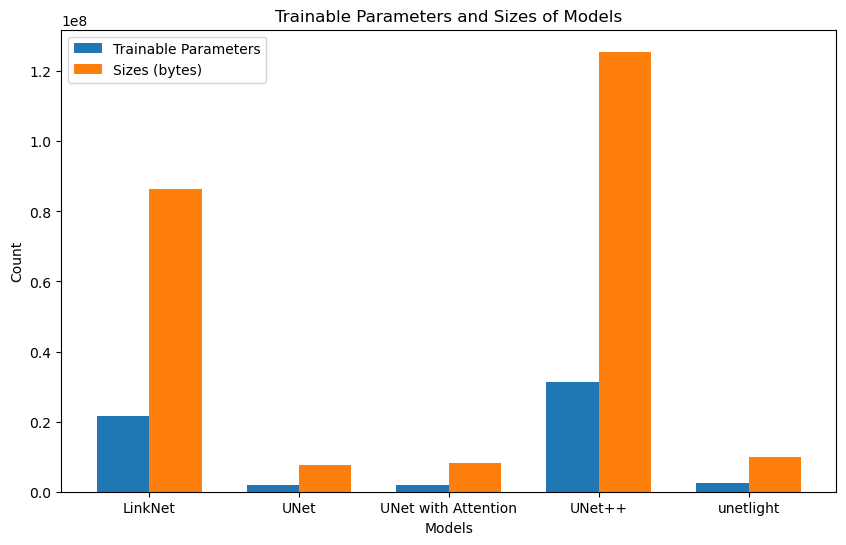

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate trainable parameters for a model
def count_trainable_params(model):
    return sum(np.prod(p.shape) for p in model.trainable_variables)

# Calculate trainable parameters and sizes for each model
models = ['LinkNet', 'UNet', 'UNet with Attention', 'UNet++', "unetlight"]
trainable_params = [count_trainable_params(model) for model in [linknet_model, unet_model, unetatt_model, unetplusplus_model, unetlight_model]]
sizes = [trainable_params[i] * 4 for i in range(len(models))]  # Assuming float32 data type

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(models))

bar1 = ax.bar(index, trainable_params, bar_width, label='Trainable Parameters')
bar2 = ax.bar(index + bar_width, sizes, bar_width, label='Sizes (bytes)')

ax.set_xlabel('Models')
ax.set_ylabel('Count')
ax.set_title('Trainable Parameters and Sizes of Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

plt.show()




In [33]:
import pandas as pd

# Function to calculate trainable parameters for a model
def count_trainable_params(model):
    trainable_params = 0
    for variable in model.trainable_variables:
        trainable_params += tf.size(variable)
    return trainable_params.numpy()

# Assuming linknet_model, unet_model, unetatt_model, unetplusplus_model are loaded models

# Calculate trainable parameters and sizes for each model
models = ['LinkNet', 'UNet', 'UNet with Attention', 'UNet++', "unetlight"]
trainable_params = [count_trainable_params(model) for model in [linknet_model, unet_model, unetatt_model, unetplusplus_model, unetlight_model]]
sizes = [trainable_params[i] * 4 for i in range(len(models))]  # Assuming float32 data type

# Create a DataFrame
df = pd.DataFrame({'Model': models, 'Trainable Parameters': trainable_params, 'Sizes (bytes)': sizes})

# Display the DataFrame
print(df)



                 Model  Trainable Parameters  Sizes (bytes)
0              LinkNet              21603841       86415364
1                 UNet               1941249        7764996
2  UNet with Attention               2029089        8116356
3               UNet++              31391297      125565188
4            unetlight               2482305        9929220


In [5]:
!pip install tensorflow_hub


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for tensorflow_hub from https://files.pythonhosted.org/packages/e5/50/00dba77925bf2a0a1e45d7bcf8a69a1d2534fb4bb277d9010bd148d2235e/tensorflow_hub-0.16.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tf-keras>=2.14.1 from https://files.pythonhosted.org/packages/75/aa/cf09f8956d4f276f655b13674e15d8d6015fd832f9689aa9ff2a515781ab/tf_keras-2.16.0-py3-none-any.whl.metadata
  Obtaining dependency information for tensorflow<2.17,>=2.16 from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency informati

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
segmentation-models 1.0.1 requires efficientnet==1.0.0, but you have efficientnet 1.1.1 which is incompatible.


# 5. Conclusion:
### In the context of landslide detection, the LinkNet model demonstrated superior accuracy on test datasets compared to Unet. However, Unet outperformed LinkNet on training datasets. It's worth noting that the LinkNet model entails significantly greater computational complexity, boasting 216 million trainable parameters. Training the LinkNet model required over 1000 minutes, whereas Unet completed training in 178 minutes on the same datasets. The relatively higher performance of Unet during training but lower performance on the test dataset suggests a potential susceptibility to overfitting, emphasizing the importance of implementing early stopping techniques.
### Both models were trained on an Intel(R) Xeon(R) Bronze 3204 CPU @ 1.90GHz (2 processors) with 128GB of installed RAM.